# Import Libraries

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, classification_report
from pytorch_tabnet.tab_model import TabNetClassifier
import torch
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, classification_report, confusion_matrix, RocCurveDisplay
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import torch
from time import time
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.metrics import (
    classification_report, 
    roc_auc_score, 
    ConfusionMatrixDisplay, 
    RocCurveDisplay
)
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd
from sklearn.metrics import (
    classification_report, roc_auc_score, accuracy_score,
    f1_score, confusion_matrix, RocCurveDisplay
)
from imblearn.over_sampling import SMOTE




# Data Cleaning & Exploration

## Load the merged dataset and list columns

In [2]:
# Load the final merged dataset
data_path = '/Users/yvesassali/Documents/DOCS/Cours McGill/BUSA-649 Community Capstone/Models/Data/Home Credit Default Risk/Clean_data/application_final_merged_train_only.csv'
merged = pd.read_csv(data_path)

# List all columns
# Print in groups of N columns per line
N = 10
for i in range(0, len(merged.columns), N):
    print(merged.columns[i:i+N].tolist())


['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY']
['AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION']
['DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS']
['REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY']
['ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 

## General info + types + missing value counts

In [3]:
# Overview of dataset
print("=== Data Info ===")
merged.info()

# Basic stats
print("\n=== Descriptive Statistics (numerical) ===")
print(merged.describe())

# Missing value counts
print("\n=== Missing Value Count ===")
missing_summary = merged.isnull().sum()
missing_summary = missing_summary[missing_summary > 0].sort_values(ascending=False)
print(missing_summary)


=== Data Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356255 entries, 0 to 356254
Columns: 237 entries, SK_ID_CURR to STATUS_UNUSED OFFER_SUM
dtypes: float64(181), int64(40), object(16)
memory usage: 644.2+ MB

=== Descriptive Statistics (numerical) ===
          SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  356255.000000  356255.000000  356255.000000      3.562550e+05   
mean   278128.000000       0.138095       0.414316      1.701161e+05   
std    102842.104413       0.291237       0.720378      2.235068e+05   
min    100001.000000       0.000000       0.000000      2.565000e+04   
25%    189064.500000       0.000000       0.000000      1.125000e+05   
50%    278128.000000       0.000000       0.000000      1.530000e+05   
75%    367191.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      20.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.562550e+05  356219.


## HANDLE MISSING VALUES

### Plot missing value percentages

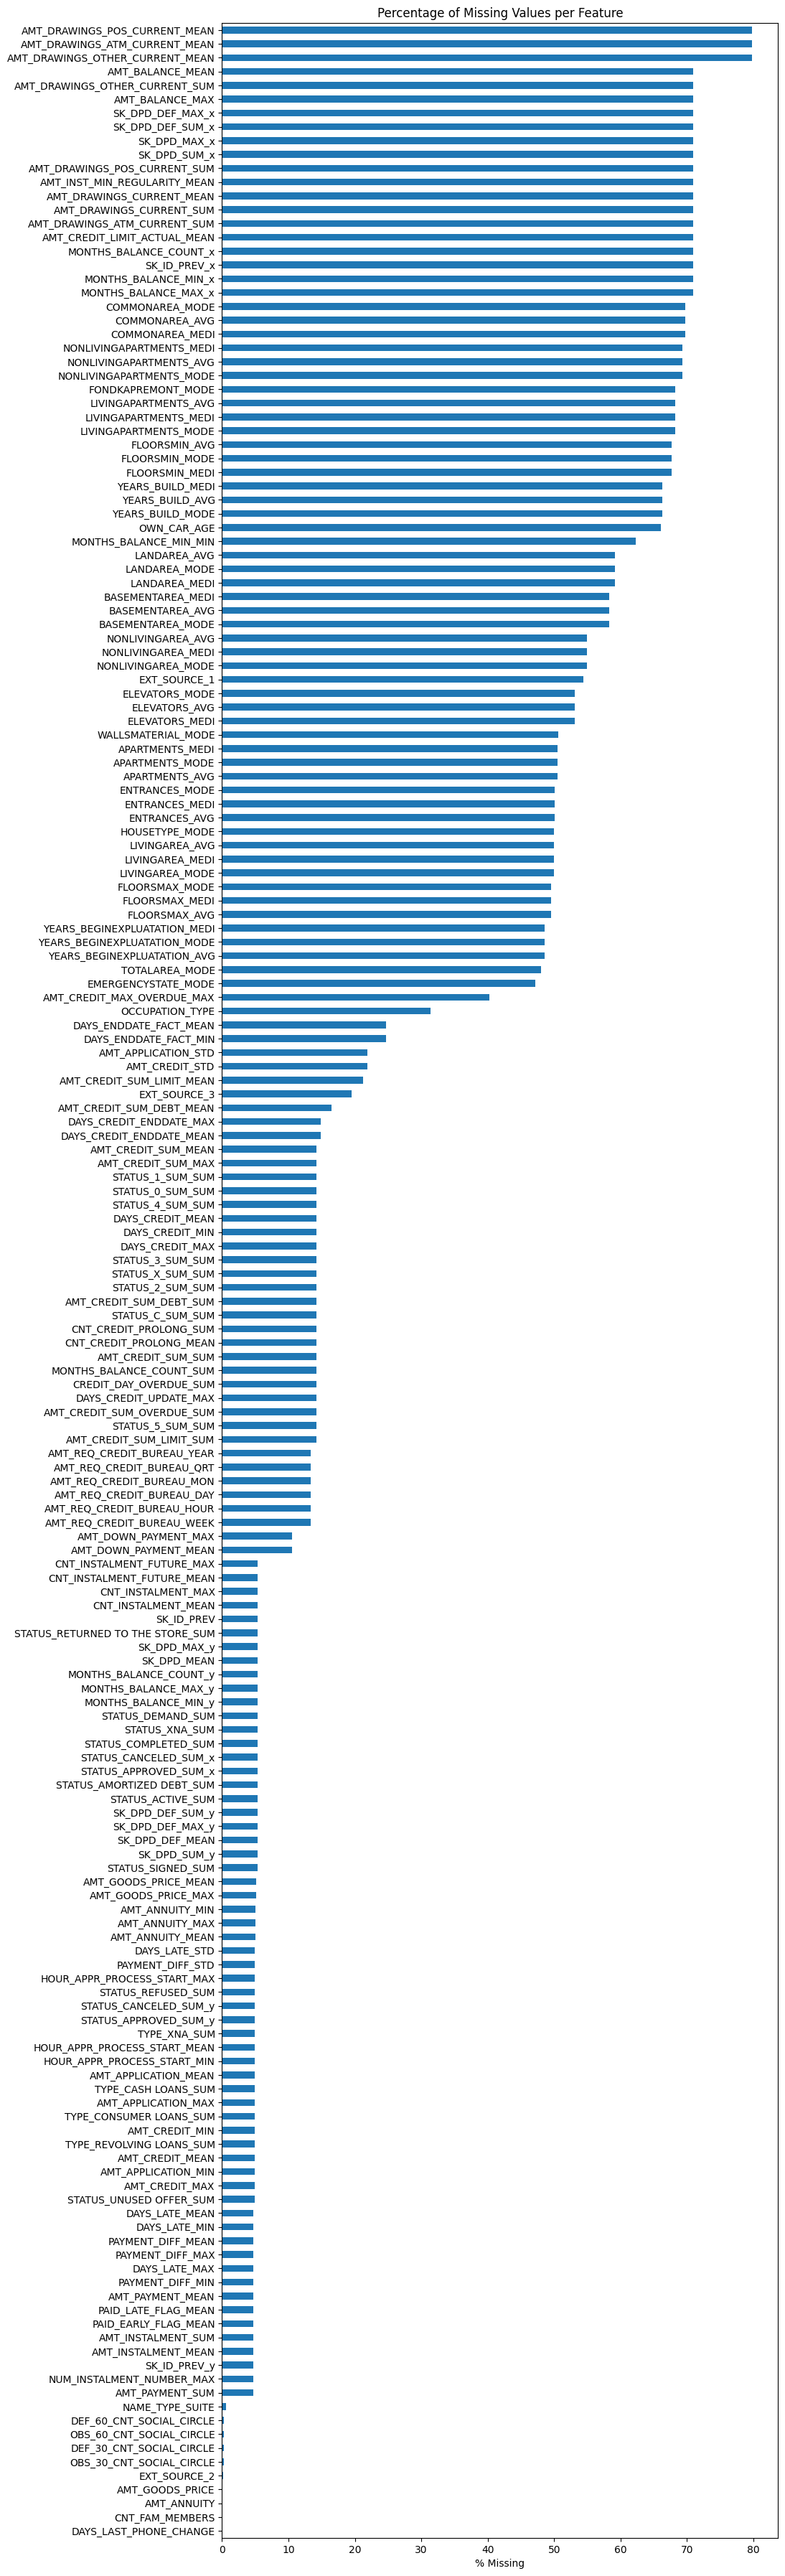

In [4]:
missing_percent = (merged.isnull().mean() * 100).sort_values(ascending=False)
missing_percent = missing_percent[missing_percent > 0]

plt.figure(figsize=(10, max(6, len(missing_percent) * 0.25)))
missing_percent.plot(kind='barh')
plt.xlabel('% Missing')
plt.title('Percentage of Missing Values per Feature')
plt.gca().invert_yaxis()
plt.show()


In [5]:
# Calculate % missing
missing_percent = merged.isnull().mean() * 100
high_missing = missing_percent[missing_percent > 60].sort_values(ascending=False)

# Convert to DataFrame
high_missing_df = high_missing.reset_index()
high_missing_df.columns = ['Feature', 'PercentMissing']

# Set pandas option to display all rows
pd.set_option('display.max_rows', None)

# Display the DataFrame
print(f"Number of features with >60% missing: {len(high_missing_df)}")
display(high_missing_df)


Number of features with >60% missing: 38


,Feature,PercentMissing
0,AMT_DRAWINGS_POS_CURRENT_MEAN,79.735302
1,AMT_DRAWINGS_ATM_CURRENT_MEAN,79.735302
2,AMT_DRAWINGS_OTHER_CURRENT_MEAN,79.735302
3,MONTHS_BALANCE_MIN_x,70.931496
4,AMT_DRAWINGS_CURRENT_MEAN,70.931496
5,AMT_BALANCE_MEAN,70.931496
6,AMT_BALANCE_MAX,70.931496
7,AMT_CREDIT_LIMIT_ACTUAL_MEAN,70.931496
8,AMT_DRAWINGS_ATM_CURRENT_SUM,70.931496
9,AMT_DRAWINGS_CURRENT_SUM,70.931496


### Missing Value Handling Summary

1. Dropping high-missing housing / real estate features
We dropped features with more than 60% missing values related to real estate or housing characteristics (e.g., `COMMONAREA`, `LANDAREA`, `APARTMENTS`, `ENTRANCES`, `ELEVATORS`). These features have too many missing values to impute reliably and may not generalize well for modeling.

---

 2. Imputing 0 for selected credit usage / delinquency / balance features
For features related to amounts, limits, or counts in credit usage (e.g., `AMT_DRAWINGS_*`, `AMT_BALANCE_*`, `AMT_CREDIT_LIMIT_ACTUAL_MEAN`, `SK_DPD_*`, `MONTHS_BALANCE_*`):
- Missing values were filled with `0`.
- Reason: A missing value is assumed to represent no activity (no drawings, no overdue, no balance).

---

 3. Imputing sentinel values for socio-economic indicators
For `OWN_CAR_AGE`:
- Missing values were filled with `-1`.
- Reason: A missing value likely indicates no car ownership, and `-1` serves as a sentinel to distinguish it from valid ages.

---

 4. Imputing predictive features (EXT_SOURCE variables) with median
For `EXT_SOURCE_1`, `EXT_SOURCE_2`, `EXT_SOURCE_3`:
- Missing values were filled with the median of each variable.
- Reason: These external scores are predictive, and median imputation preserves central tendency without skewing the distribution.

---

 5. Handling bureau request features
For features like `AMT_REQ_CREDIT_BUREAU_*`:
- Missing values were filled with `0`.
- Reason: Missing values likely mean no bureau request was made.

---

 6. Imputing timeline features
For `DAYS_ENDDATE_FACT` and related timeline features:
- Missing values were filled with `0`.
- Reason: Missing values suggest no end date was set, which can be treated as no event occurred.

---

 7. Dropping remaining real estate features with high missingness
We dropped remaining features that still had >60% missing values and were related to real estate / housing:
- Examples: `YEARS_BUILD`, `APARTMENTS`, `ENTRANCES`, `LIVINGAREA`, `FLOORSMAX`, `TOTALAREA`
- Reason: High missingness and unlikely to add significant predictive power after imputation.

---

 8. Categorical features
For categorical features (`OCCUPATION_TYPE`, `NAME_TYPE_SUITE`, `HOUSETYPE_MODE`, `WALLSMATERIAL_MODE`, `EMERGENCYSTATE_MODE`, `FONDKAPREMONT_MODE`):
- Missing values were filled with `'Unknown'`.
- Reason: This avoids introducing bias by assuming a particular category and allows the model to learn patterns from missingness.

---

 9. Imputing amounts, limits, and payment-related features
- For `AMT_GOODS_PRICE`: Imputed with median to preserve distribution.
- For loan type sums (e.g., `TYPE_CASH_LOANS_SUM`, `TYPE_REVOLVING_LOANS_SUM`): Imputed with `0` as missing implies absence of loans of that type.
- For payment, instalment, and timeline-related features (e.g., `AMT_PAYMENT`, `AMT_INSTALMENT`, `NUM_INSTALMENT`, `DAYS_LATE`, `PAYMENT_DIFF`): Imputed with `0` to represent no payment or delay.

---

 10. Social circle features
For `OBS_`, `DEF_`, and `SOCIAL_CIRCLE` features:
- Missing values were filled with `0`.
- Reason: Missing implies no social connections of interest in these measures.

---

 11. Handling specific features
- `PAID_EARLY_FLAG_MEAN`: Filled with median, as it's a continuous indicator of early repayment behavior.
- `CNT_FAM_MEMBERS`: Filled with mode, as this is a count feature where mode represents the most common family size.
- `DAYS_LAST_PHONE_CHANGE`: Filled with median, as it is a continuous timeline variable.

---

 Summary of approach
- **Dropped features**: High missingness and low potential value for prediction.
- **Zero imputation**: For counts, credit limits, balances, and timelines where absence implies no activity.
- **Median / mode imputation**: For predictive continuous or count variables where central tendency is meaningful.
- **Categorical imputation**: `'Unknown'` to indicate absence of information without biasing toward existing categories.


In [6]:
# Features we'll keep despite missingness and impute 0 (credit usage / delinquency related)
keep_zero_impute = [
    'AMT_DRAWINGS_POS_CURRENT_MEAN',
    'AMT_DRAWINGS_ATM_CURRENT_MEAN',
    'AMT_DRAWINGS_OTHER_CURRENT_MEAN',
    'AMT_DRAWINGS_CURRENT_SUM',
    'AMT_BALANCE_MEAN',
    'AMT_BALANCE_MAX',
    'AMT_CREDIT_LIMIT_ACTUAL_MEAN',
    'SK_DPD_SUM_x',
    'SK_DPD_DEF_SUM_x',
    'MONTHS_BALANCE_MIN_x',
    'MONTHS_BALANCE_MAX_x'
]

# Features we'll keep and impute with -1 (socio-economic indicator)
keep_special_impute = {
    'OWN_CAR_AGE': -1
}

# Features we'll keep and impute with median (predictive features)
keep_median_impute = [
    'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3'
]

# Features we'll drop (housing / land area / common area with high missing)
drop_features = [
    col for col in merged.columns 
    if (merged[col].isnull().mean() * 100 > 60) and (
        'COMMONAREA' in col or
        'NONLIVING' in col or
        'FLOORSMIN' in col or
        'LANDAREA' in col or
        'APARTMENTS' in col or
        'ENTRANCES' in col or
        'FLOORSMAX' in col or
        'YEARS' in col or
        'EMERGENCYSTATE' in col
    )
]

# Apply handling
merged_clean = merged.drop(columns=drop_features)
print(f"Dropped {len(drop_features)} high-missing housing/land features.")

# Impute 0 for selected features
for col in keep_zero_impute:
    if col in merged_clean.columns:
        merged_clean[col].fillna(0, inplace=True)

# Impute special sentinel values
for col, val in keep_special_impute.items():
    if col in merged_clean.columns:
        merged_clean[col].fillna(val, inplace=True)

# Impute median for EXT_SOURCE_* features
for col in keep_median_impute:
    if col in merged_clean.columns:
        median_val = merged_clean[col].median()
        merged_clean[col].fillna(median_val, inplace=True)

print("Targeted missing value handling complete. Remaining missing values will be handled later.")

# Update merged
merged = merged_clean


###################


# DPD / arrears / credit balance related
dpd_features = [col for col in merged.columns if 'DPD' in col or 'OVERDUE' in col or 'BALANCE' in col]
for col in dpd_features:
    if merged[col].isnull().sum() > 0:
        merged[col].fillna(0, inplace=True)

# Credit usage / payment / limit
credit_usage_features = [col for col in merged.columns if 'AMT_DRAWINGS' in col or 'CNT_CREDIT' in col or 'CNT_INSTALMENT' in col]
for col in credit_usage_features:
    if merged[col].isnull().sum() > 0:
        merged[col].fillna(0, inplace=True)

# Real estate features: drop if still high missing
real_estate_features = [col for col in merged.columns if any(k in col for k in ['LANDAREA', 'BASEMENTAREA', 'NONLIVINGAREA', 'ELEVATORS'])]
for col in real_estate_features:
    if merged[col].isnull().mean() * 100 > 60:
        merged.drop(columns=col, inplace=True)
        print(f"Dropped {col} (too much missing)")
    else:
        merged[col].fillna(0, inplace=True)

# Categorical: occupation, suite
categorical_features = ['OCCUPATION_TYPE', 'NAME_TYPE_SUITE', 'WALLSMATERIAL_MODE']
for col in categorical_features:
    if col in merged.columns:
        merged[col].fillna('Unknown', inplace=True)

print("Additional missing value handling complete.")

# --- Additional block ---

# Drop remaining real estate features with >60% missing
for col in merged.columns:
    if (merged[col].isnull().mean() * 100 > 60) and any(k in col for k in [
        'YEARS_BUILD', 'APARTMENTS', 'ENTRANCES', 'LIVINGAREA', 'HOUSETYPE',
        'FLOORSMAX', 'NONLIVINGAREA', 'TOTALAREA'
    ]):
        merged.drop(columns=col, inplace=True)
        print(f"Dropped {col} due to >60% missing.")

# Impute 0 for credit usage / timeline / behavioral features
credit_cols = [col for col in merged.columns if any(k in col for k in [
    'AMT_CREDIT', 'CNT_CREDIT', 'DAYS_CREDIT', 'STATUS',
    'AMT_DOWN_PAYMENT', 'CNT_INSTALMENT', 'AMT_APPLICATION', 'AMT_ANNUITY'
])]
for col in credit_cols:
    if merged[col].isnull().sum() > 0:
        merged[col].fillna(0, inplace=True)

# Impute 'Unknown' for categorical mode features
categorical_cols = ['OCCUPATION_TYPE', 'NAME_TYPE_SUITE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']
for col in categorical_cols:
    if col in merged.columns:
        merged[col].fillna('Unknown', inplace=True)


####################


# Drop remaining high-missing real estate features
drop_real_estate = [col for col in merged.columns if (
    merged[col].isnull().mean() * 100 > 60 and
    any(k in col for k in [
        'APARTMENTS', 'ENTRANCES', 'LIVINGAREA', 'FLOORSMAX',
        'YEARS_BEGINEXPLUATATION', 'TOTALAREA'
    ])
)]
merged.drop(columns=drop_real_estate, inplace=True)
for col in drop_real_estate:
    print(f"Dropped {col} due to high missingness.")

# Impute 'Unknown' for categorical
if 'FONDKAPREMONT_MODE' in merged.columns:
    merged['FONDKAPREMONT_MODE'].fillna('Unknown', inplace=True)

# Impute 0 for bureau requests
bureau_cols = [col for col in merged.columns if 'AMT_REQ_CREDIT_BUREAU' in col]
for col in bureau_cols:
    merged[col].fillna(0, inplace=True)

# Impute 0 for timeline features
timeline_cols = [col for col in merged.columns if 'DAYS_ENDDATE_FACT' in col]
for col in timeline_cols:
    merged[col].fillna(0, inplace=True)

# Impute 0 for loan type sums and other derived features
other_zero_cols = [col for col in merged.columns if any(k in col for k in [
    'TYPE_CASH_LOANS_SUM', 'TYPE_REVOLVING_LOANS_SUM',
    'PAYMENT_DIFF', 'PAID_LATE_FLAG', 'SK_ID_PREV'
])]
for col in other_zero_cols:
    merged[col].fillna(0, inplace=True)


############



drop_housing = [col for col in merged.columns if any(k in col for k in [
    'APARTMENTS', 'ENTRANCES', 'LIVINGAREA', 'FLOORSMAX',
    'YEARS_BEGINEXPLUATATION', 'TOTALAREA'
])]
merged.drop(columns=drop_housing, inplace=True)
for col in drop_housing:
    print(f"Dropped {col} (too much missing and unreliable imputation)")

# Drop AMT_INST_MIN_REGULARITY_MEAN
if 'AMT_INST_MIN_REGULARITY_MEAN' in merged.columns:
    merged.drop(columns='AMT_INST_MIN_REGULARITY_MEAN', inplace=True)
    print("Dropped AMT_INST_MIN_REGULARITY_MEAN (too much missing)")

# Impute AMT_GOODS_PRICE_* with median
price_cols = [col for col in merged.columns if 'AMT_GOODS_PRICE' in col]
for col in price_cols:
    median_val = merged[col].median()
    merged[col].fillna(median_val, inplace=True)
    print(f"Filled {col} with median {median_val}")

# Impute TYPE_*_SUM with 0
type_cols = [col for col in merged.columns if 'TYPE_' in col and '_SUM' in col]
for col in type_cols:
    merged[col].fillna(0, inplace=True)
    print(f"Filled {col} with 0")

# Impute payment / installment / days late with 0
pay_cols = [col for col in merged.columns if any(k in col for k in [
    'AMT_PAYMENT', 'AMT_INSTALMENT', 'NUM_INSTALMENT', 'DAYS_LATE', 'PAYMENT_DIFF'
])]
for col in pay_cols:
    merged[col].fillna(0, inplace=True)
    print(f"Filled {col} with 0")

# Impute HOUR_APPR_PROCESS_START_* with median
hour_cols = [col for col in merged.columns if 'HOUR_APPR_PROCESS_START' in col]
for col in hour_cols:
    median_val = merged[col].median()
    merged[col].fillna(median_val, inplace=True)
    print(f"Filled {col} with median {median_val}")

# Impute OBS_/DEF_ social circle with 0
social_cols = [col for col in merged.columns if any(k in col for k in ['OBS_', 'DEF_']) and 'SOCIAL_CIRCLE' in col]
for col in social_cols:
    merged[col].fillna(0, inplace=True)
    print(f"Filled {col} with 0")



###############


# Handle PAID_EARLY_FLAG_MEAN
if 'PAID_EARLY_FLAG_MEAN' in merged.columns:
    median_val = merged['PAID_EARLY_FLAG_MEAN'].median()
    merged['PAID_EARLY_FLAG_MEAN'].fillna(median_val, inplace=True)
    # Optionally create a missing indicator
    # merged['PAID_EARLY_FLAG_MEAN_MISSING'] = merged['PAID_EARLY_FLAG_MEAN'].isnull().astype(int)
    print(f"Filled PAID_EARLY_FLAG_MEAN with median {median_val}")

# Handle CNT_FAM_MEMBERS
if 'CNT_FAM_MEMBERS' in merged.columns:
    mode_val = merged['CNT_FAM_MEMBERS'].mode()[0]
    merged['CNT_FAM_MEMBERS'].fillna(mode_val, inplace=True)
    print(f"Filled CNT_FAM_MEMBERS with mode {mode_val}")

# Handle DAYS_LAST_PHONE_CHANGE
if 'DAYS_LAST_PHONE_CHANGE' in merged.columns:
    median_val = merged['DAYS_LAST_PHONE_CHANGE'].median()
    merged['DAYS_LAST_PHONE_CHANGE'].fillna(median_val, inplace=True)
    print(f"Filled DAYS_LAST_PHONE_CHANGE with median {median_val}")




Dropped 15 high-missing housing/land features.
Targeted missing value handling complete. Remaining missing values will be handled later.
Additional missing value handling complete.


/var/folders/9z/gqdjy52930lgjf5bhmygw0t00000gn/T/ipykernel_41830/3737457094.py:49: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_clean[col].fillna(0, inplace=True)
/var/folders/9z/gqdjy52930lgjf5bhmygw0t00000gn/T/ipykernel_41830/3737457094.py:54: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always be

Dropped APARTMENTS_AVG (too much missing and unreliable imputation)
Dropped YEARS_BEGINEXPLUATATION_AVG (too much missing and unreliable imputation)
Dropped ENTRANCES_AVG (too much missing and unreliable imputation)
Dropped FLOORSMAX_AVG (too much missing and unreliable imputation)
Dropped LIVINGAREA_AVG (too much missing and unreliable imputation)
Dropped NONLIVINGAREA_AVG (too much missing and unreliable imputation)
Dropped APARTMENTS_MODE (too much missing and unreliable imputation)
Dropped YEARS_BEGINEXPLUATATION_MODE (too much missing and unreliable imputation)
Dropped ENTRANCES_MODE (too much missing and unreliable imputation)
Dropped FLOORSMAX_MODE (too much missing and unreliable imputation)
Dropped LIVINGAREA_MODE (too much missing and unreliable imputation)
Dropped NONLIVINGAREA_MODE (too much missing and unreliable imputation)
Dropped APARTMENTS_MEDI (too much missing and unreliable imputation)
Dropped YEARS_BEGINEXPLUATATION_MEDI (too much missing and unreliable imputation)

/var/folders/9z/gqdjy52930lgjf5bhmygw0t00000gn/T/ipykernel_41830/3737457094.py:186: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged[col].fillna(median_val, inplace=True)
/var/folders/9z/gqdjy52930lgjf5bhmygw0t00000gn/T/ipykernel_41830/3737457094.py:186: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alwa

In [7]:
# Recalculate % missing
missing_percent_after = (merged.isnull().mean() * 100).sort_values(ascending=False)
missing_percent_after = missing_percent_after[missing_percent_after > 0]

# Plot if any missing remains
if not missing_percent_after.empty:
    plt.figure(figsize=(12, max(6, len(missing_percent_after) * 0.25)))
    missing_percent_after.plot(kind='barh')
    plt.xlabel('% Missing')
    plt.title('Percentage of Missing Values per Feature (After Cleaning)')
    plt.gca().invert_yaxis()
    plt.show()
else:
    print("No remaining missing values in the dataset.")


No remaining missing values in the dataset.


In [8]:
merged.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,HOUR_APPR_PROCESS_START_MIN,HOUR_APPR_PROCESS_START_MAX,TYPE_CASH LOANS_SUM,TYPE_CONSUMER LOANS_SUM,TYPE_REVOLVING LOANS_SUM,TYPE_XNA_SUM,STATUS_APPROVED_SUM_y,STATUS_CANCELED_SUM_y,STATUS_REFUSED_SUM,STATUS_UNUSED OFFER_SUM
0,100002,1.0,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,9.0,9.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,100003,0.0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,12.0,17.0,1.0,2.0,0.0,0.0,3.0,0.0,0.0,0.0
2,100004,0.0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,5.0,5.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,100006,0.0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,12.0,15.0,5.0,2.0,2.0,0.0,5.0,3.0,1.0,0.0
4,100007,0.0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,8.0,15.0,4.0,2.0,0.0,0.0,6.0,0.0,0.0,0.0
5,100008,0.0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,9.0,18.0,2.0,3.0,0.0,0.0,4.0,1.0,0.0,0.0
6,100009,0.0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,11.0,18.0,0.0,7.0,0.0,0.0,7.0,0.0,0.0,0.0
7,100010,0.0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,16.0,16.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
8,100011,0.0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,...,9.0,17.0,2.0,1.0,1.0,0.0,3.0,0.0,1.0,0.0
9,100012,0.0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,...,9.0,15.0,3.0,1.0,0.0,0.0,3.0,1.0,0.0,0.0


In [9]:
# Print in groups of N columns per line
N = 10
for i in range(0, len(merged.columns), N):
    print(merged.columns[i:i+N].tolist())

['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY']
['AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION']
['DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS']
['REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY']
['ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'BASEMENTAREA_AVG', 'ELEVATORS_AVG', 'LANDAREA_AVG', 'BASEMENTAREA_MODE', 'ELEVATORS_MODE', 'LANDAREA_MODE

### Dropping Unnecessary Features

In this step, we remove features that are either:
- **Identifiers** that do not contribute predictive value (e.g., `SK_ID_PREV`).
- **Sparse or weak features** that have many missing values or little correlation with the target (e.g., real estate or document flags).
- **Flags or indicators** known from domain knowledge to offer minimal signal (e.g., `OWN_CAR_AGE`, `NAME_TYPE_SUITE`).

The following features are removed:

- `SK_ID_PREV`, `SK_ID_PREV_x`, `SK_ID_PREV_y`
- `BASEMENTAREA_AVG`, `BASEMENTAREA_MODE`, `BASEMENTAREA_MEDI`
- `ELEVATORS_AVG`, `ELEVATORS_MODE`, `ELEVATORS_MEDI`
- `LANDAREA_AVG`, `LANDAREA_MODE`, `LANDAREA_MEDI`
- `NAME_TYPE_SUITE`, `OWN_CAR_AGE`
- All `FLAG_DOCUMENT_*` features (`FLAG_DOCUMENT_2` to `FLAG_DOCUMENT_21`)

 Rationale:
- **ID fields**: Purely identifiers, no predictive value.
- **Real estate indicators**: Often sparse, missing or weak predictors in credit risk modeling.
- **Document flags**: Typically noisy, rare, and add little incremental value.
- **Own car age / type suite**: Frequently missing or weakly predictive in prior studies.

This helps reduce dimensionality, avoid noise, and improve model interpretability and performance.

 Outcome:
- Cleaner dataset with more relevant features retained.
- Reduced risk of overfitting from sparse/noisy variables.


In [10]:
# List of features to drop (based on relevance and likely high missingness)
drop_features = [
    # ID columns not useful for modeling
    'SK_ID_PREV', 'SK_ID_PREV_x', 'SK_ID_PREV_y',
    
    # Real estate / housing features that tend to be sparse or weak
    'BASEMENTAREA_AVG', 'BASEMENTAREA_MODE', 'BASEMENTAREA_MEDI',
    'ELEVATORS_AVG', 'ELEVATORS_MODE', 'ELEVATORS_MEDI',
    'LANDAREA_AVG', 'LANDAREA_MODE', 'LANDAREA_MEDI',
    
    # Weak or noisy flags
    'NAME_TYPE_SUITE',  # Often weak signal
    'OWN_CAR_AGE',      # Sparse
    
    # Document flags (often low predictive power)
    'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4',
    'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7',
    'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10',
    'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13',
    'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16',
    'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19',
    'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21'
]

# Drop those columns if they exist in the DataFrame
drop_features = [col for col in drop_features if col in merged.columns]

# Perform the drop
merged = merged.drop(columns=drop_features)

# Print confirmation
print(f"Dropped {len(drop_features)} unnecessary features: {drop_features}")
print(f"New shape: {merged.shape}")


Dropped 34 unnecessary features: ['SK_ID_PREV', 'SK_ID_PREV_x', 'SK_ID_PREV_y', 'BASEMENTAREA_AVG', 'BASEMENTAREA_MODE', 'BASEMENTAREA_MEDI', 'ELEVATORS_AVG', 'ELEVATORS_MODE', 'ELEVATORS_MEDI', 'LANDAREA_AVG', 'LANDAREA_MODE', 'LANDAREA_MEDI', 'NAME_TYPE_SUITE', 'OWN_CAR_AGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']
New shape: (356255, 168)


## HANDLE NON NUMERIC VALUES

### Check constant columns (no variance),  numeric vs non-numeric columns

In [11]:
# Identify columns with only one unique value
constant_cols = [col for col in merged.columns if merged[col].nunique(dropna=False) == 1]
print(f"Columns with no variance (constant across dataset): {constant_cols}")


# Check data types
numeric_cols = merged.select_dtypes(include=['number']).columns.tolist()
non_numeric_cols = merged.select_dtypes(exclude=['number']).columns.tolist()

print(f"Numeric columns: {len(numeric_cols)}")
print(f"Non-numeric columns: {non_numeric_cols}")

Columns with no variance (constant across dataset): []
Numeric columns: 153
Non-numeric columns: ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']


## Label Encoding Choice for TabNet

In this project, we chose to apply **label encoding** (integer encoding) to all categorical variables before training TabNet.

 Rationale:

- **TabNet is designed to work with integer-encoded categorical features**. It can internally learn embeddings for these features, allowing it to capture relationships between categories without needing one-hot encoding.
- **Label encoding reduces input dimensionality** compared to one-hot encoding. This makes the model more memory efficient and faster to train, especially when dealing with high-cardinality features.
- **Maintains categorical structure**: Label encoding preserves the fact that these features are categorical (each unique integer represents a distinct category), enabling TabNet to learn meaningful representations through its feature transformer blocks.

 Why not one-hot encoding?

- One-hot encoding creates sparse, high-dimensional inputs that are unnecessary for TabNet.
- It can slow down training and increase memory usage without adding value, since TabNet can model category relationships through embeddings.

 Conclusion:

➡ We apply **label encoding** to all categorical columns so that TabNet can make full use of its internal embedding mechanism.  
➡ This choice improves efficiency and aligns with TabNet's architectural strengths.


In [12]:


# List of your known non-numeric columns
non_numeric_cols = [
    'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
    'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
    'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
    'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
    'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'
]

# Filter to only those that still exist in merged
non_numeric_cols = [col for col in non_numeric_cols if col in merged.columns]

# Dictionary to store label encoders for later use (optional, if you want to inverse transform or interpret)
label_encoders = {}

# Apply label encoding
for col in non_numeric_cols:
    le = LabelEncoder()
    merged[col] = merged[col].astype(str)  # Ensure all values are string (LabelEncoder requirement)
    merged[col] = le.fit_transform(merged[col])
    label_encoders[col] = le  # Save encoder

print(f"Label encoding complete for columns: {non_numeric_cols}")


Label encoding complete for columns: ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']


In [13]:
non_numeric_remaining = merged.select_dtypes(exclude=['number']).columns.tolist()

if non_numeric_remaining:
    print(f"Non-numeric columns remaining: {non_numeric_remaining}")
else:
    print("No non-numeric columns remaining. All columns are numeric.")


No non-numeric columns remaining. All columns are numeric.


In [14]:
merged.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,HOUR_APPR_PROCESS_START_MIN,HOUR_APPR_PROCESS_START_MAX,TYPE_CASH LOANS_SUM,TYPE_CONSUMER LOANS_SUM,TYPE_REVOLVING LOANS_SUM,TYPE_XNA_SUM,STATUS_APPROVED_SUM_y,STATUS_CANCELED_SUM_y,STATUS_REFUSED_SUM,STATUS_UNUSED OFFER_SUM
0,100002,1.0,0,1,0,1,0,202500.0,406597.5,24700.5,...,9.0,9.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,100003,0.0,0,0,0,0,0,270000.0,1293502.5,35698.5,...,12.0,17.0,1.0,2.0,0.0,0.0,3.0,0.0,0.0,0.0
2,100004,0.0,1,1,1,1,0,67500.0,135000.0,6750.0,...,5.0,5.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,100006,0.0,0,0,0,1,0,135000.0,312682.5,29686.5,...,12.0,15.0,5.0,2.0,2.0,0.0,5.0,3.0,1.0,0.0
4,100007,0.0,0,1,0,1,0,121500.0,513000.0,21865.5,...,8.0,15.0,4.0,2.0,0.0,0.0,6.0,0.0,0.0,0.0
5,100008,0.0,0,1,0,1,0,99000.0,490495.5,27517.5,...,9.0,18.0,2.0,3.0,0.0,0.0,4.0,1.0,0.0,0.0
6,100009,0.0,0,0,1,1,1,171000.0,1560726.0,41301.0,...,11.0,18.0,0.0,7.0,0.0,0.0,7.0,0.0,0.0,0.0
7,100010,0.0,0,1,1,1,0,360000.0,1530000.0,42075.0,...,16.0,16.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
8,100011,0.0,0,0,0,1,0,112500.0,1019610.0,33826.5,...,9.0,17.0,2.0,1.0,1.0,0.0,3.0,0.0,1.0,0.0
9,100012,0.0,1,1,0,1,0,135000.0,405000.0,20250.0,...,9.0,15.0,3.0,1.0,0.0,0.0,3.0,1.0,0.0,0.0


### Correlation heatmap (for numeric features)

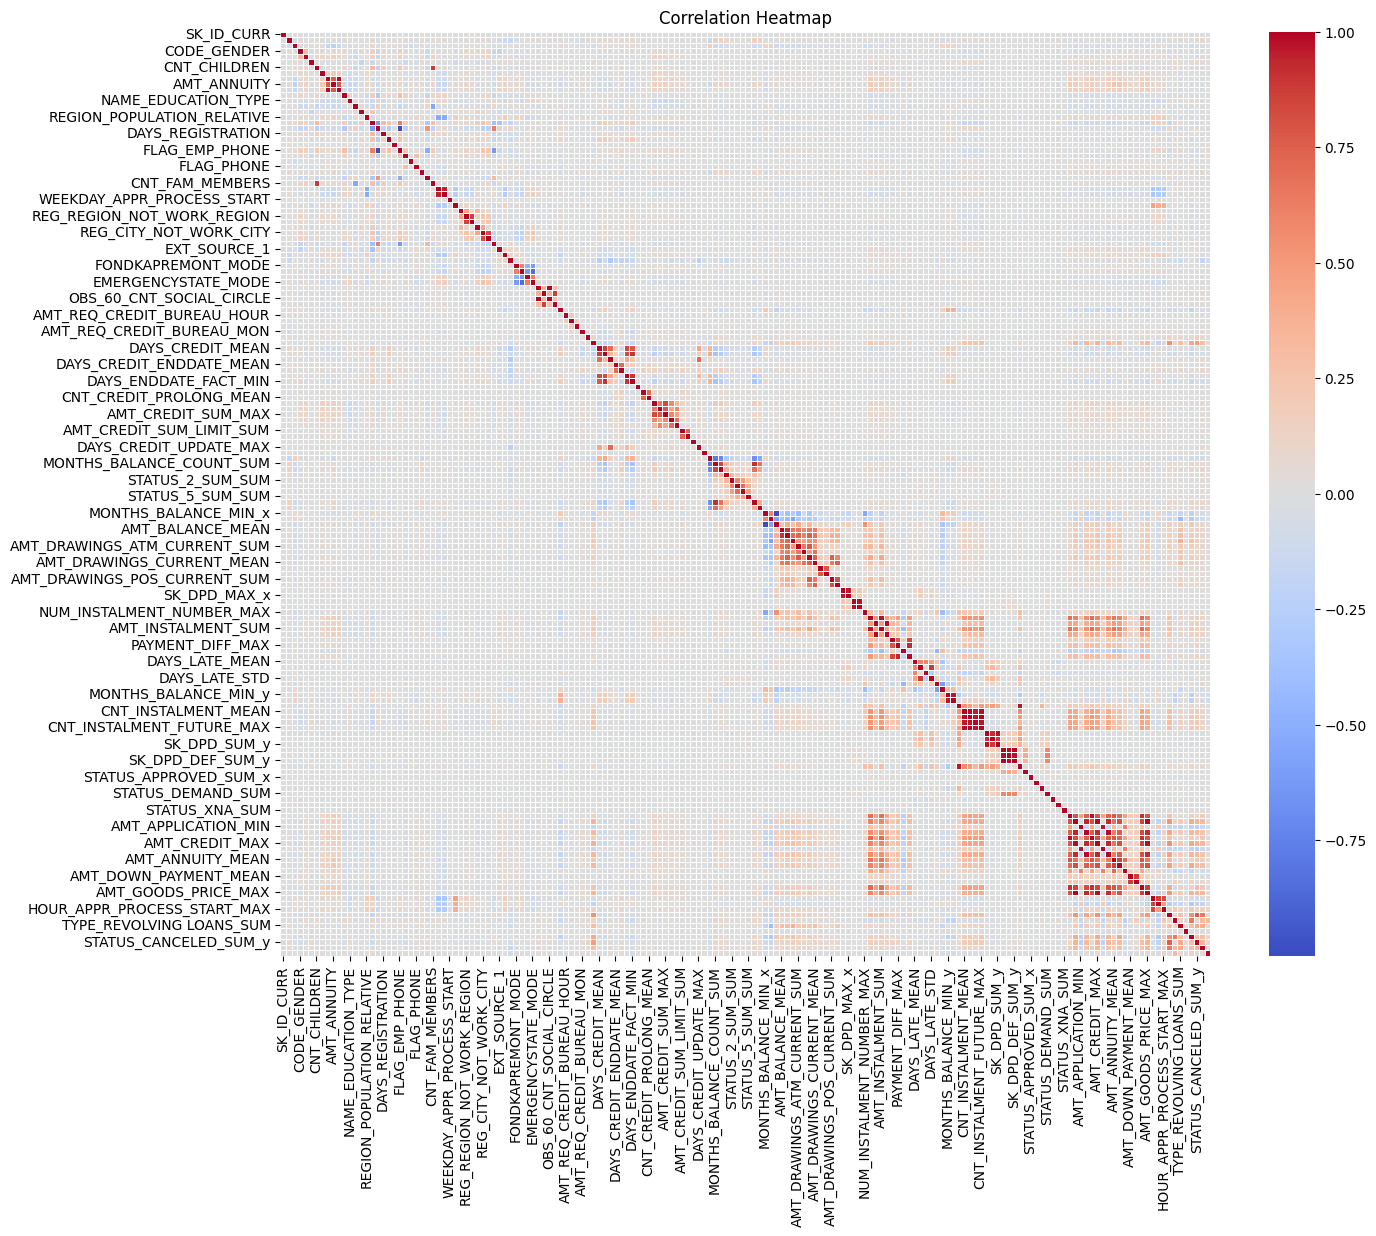

In [15]:
# Ensure TARGET is included
numeric_cols = merged.select_dtypes(include=['number']).columns.tolist()
corr = merged[numeric_cols].corr()

# Plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 12))
sns.heatmap(corr, cmap='coolwarm', center=0, cbar=True, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


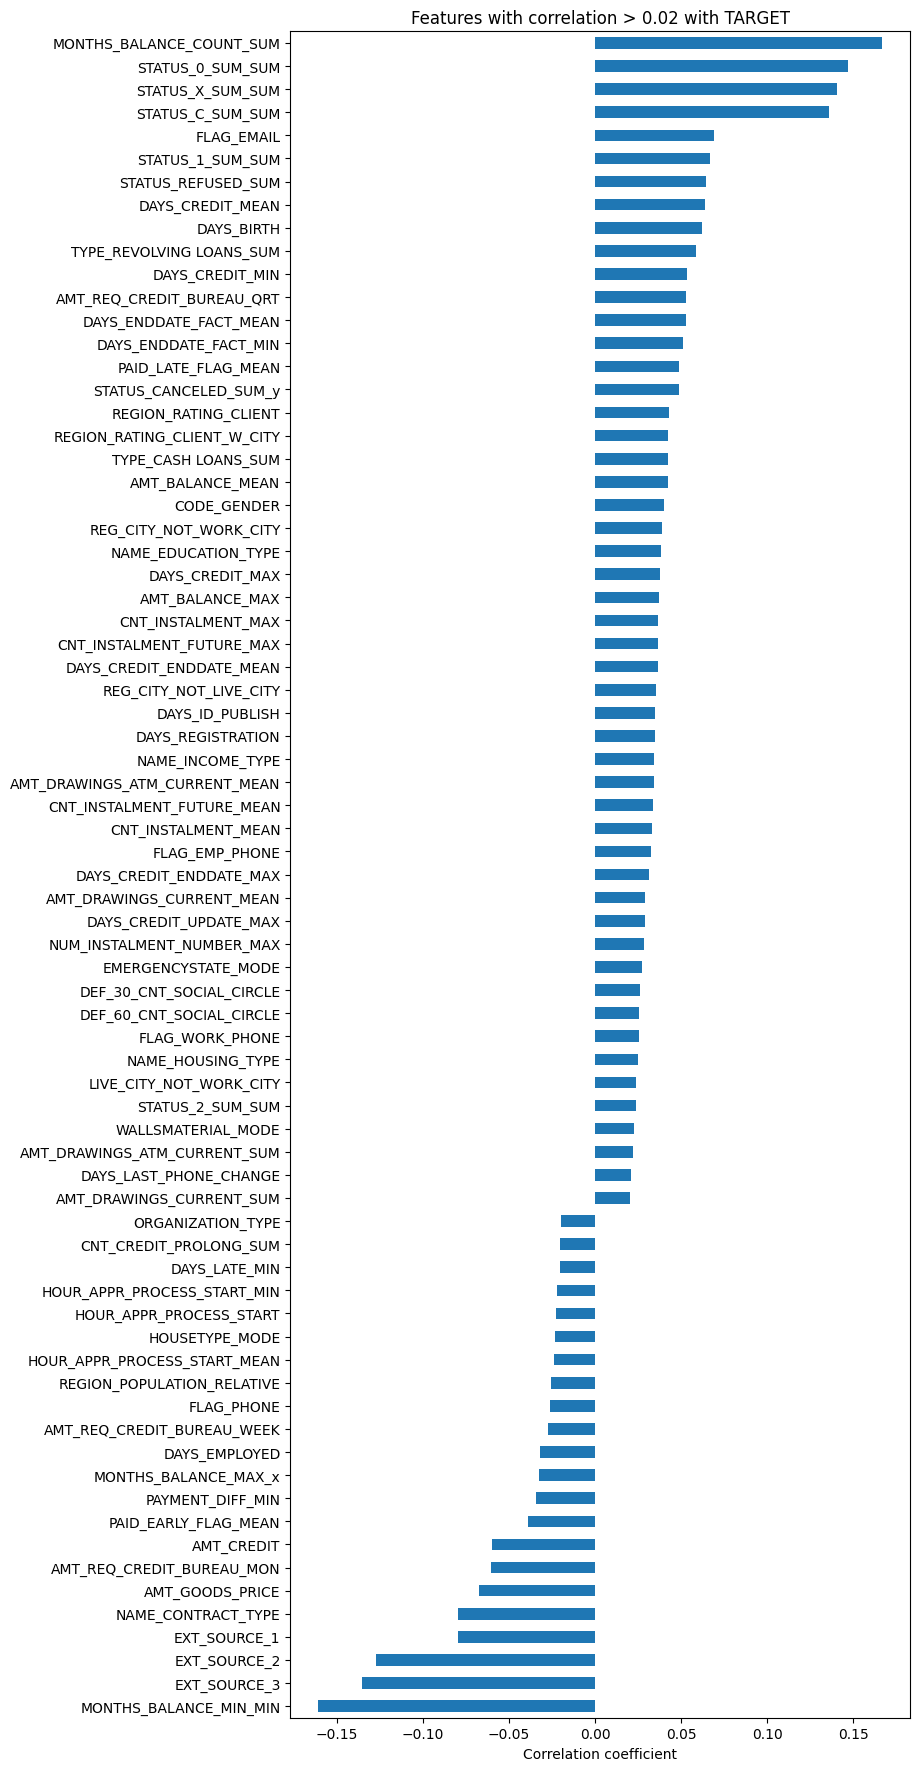

In [16]:
# Compute correlation with TARGET
corr_with_target = merged.corr()['TARGET'].sort_values()

# Filter by threshold
threshold = 0.02
corr_filtered = corr_with_target[(corr_with_target.abs() > threshold) & (corr_with_target.index != 'TARGET')]

# Plot
plt.figure(figsize=(8, len(corr_filtered) * 0.3))
corr_filtered.plot(kind='barh')
plt.title(f'Features with correlation > {threshold} with TARGET')
plt.xlabel('Correlation coefficient')
plt.show()


### High correlation pairs (deeper insight)

In [17]:
# Extract pairs of features with high correlation
threshold = 0.9
high_corr = (corr.abs() > threshold) & (corr.abs() < 1.0)

high_corr_pairs = []
for col in high_corr.columns:
    for idx in high_corr.index:
        if high_corr.loc[idx, col]:
            pair = tuple(sorted([col, idx]))
            if pair not in high_corr_pairs:
                high_corr_pairs.append(pair)

print(f"Highly correlated feature pairs (>|{threshold}|):")
for pair in high_corr_pairs:
    print(pair)


Highly correlated feature pairs (>|0.9|):
('AMT_CREDIT', 'AMT_GOODS_PRICE')
('DAYS_EMPLOYED', 'FLAG_EMP_PHONE')
('REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY')
('OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE')
('DAYS_CREDIT_MIN', 'DAYS_ENDDATE_FACT_MIN')
('MONTHS_BALANCE_COUNT_SUM', 'STATUS_C_SUM_SUM')
('MONTHS_BALANCE_COUNT_x', 'MONTHS_BALANCE_MIN_x')
('AMT_BALANCE_MAX', 'AMT_BALANCE_MEAN')
('SK_DPD_MAX_x', 'SK_DPD_SUM_x')
('SK_DPD_DEF_MAX_x', 'SK_DPD_DEF_SUM_x')
('AMT_INSTALMENT_SUM', 'AMT_PAYMENT_SUM')
('AMT_INSTALMENT_MEAN', 'AMT_PAYMENT_MEAN')
('PAYMENT_DIFF_MAX', 'PAYMENT_DIFF_STD')
('MONTHS_BALANCE_MAX_y', 'MONTHS_BALANCE_MIN_y')
('MONTHS_BALANCE_COUNT_y', 'STATUS_ACTIVE_SUM')
('CNT_INSTALMENT_MAX', 'CNT_INSTALMENT_MEAN')
('CNT_INSTALMENT_FUTURE_MEAN', 'CNT_INSTALMENT_MEAN')
('CNT_INSTALMENT_FUTURE_MAX', 'CNT_INSTALMENT_MEAN')
('CNT_INSTALMENT_FUTURE_MEAN', 'CNT_INSTALMENT_MAX')
('CNT_INSTALMENT_FUTURE_MAX', 'CNT_INSTALMENT_MAX')
('CNT_INSTALMENT_FUTURE_MAX', 'CNT

### Distribution of TARGET


=== TARGET Distribution ===
TARGET
0.0    282686
0.5     48744
1.0     24825
Name: count, dtype: int64


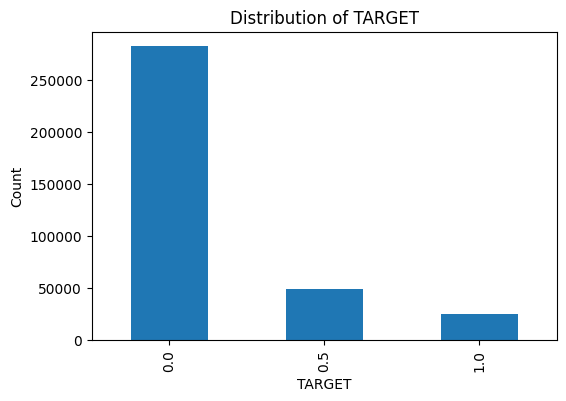

In [18]:

# Check distribution of TARGET
if 'TARGET' in merged.columns:
    target_counts = merged['TARGET'].value_counts(dropna=False)
    print("\n=== TARGET Distribution ===")
    print(target_counts)

    plt.figure(figsize=(6, 4))
    target_counts.plot(kind='bar')
    plt.title("Distribution of TARGET")
    plt.xlabel("TARGET")
    plt.ylabel("Count")
    plt.show()

## Scaling and Normalization Choice for TabNet

In this project, we decided **not to apply scaling or normalization** to our dataset before training TabNet. 

 Rationale:

- **TabNet is designed for raw tabular data**: Its architecture includes feature transformer and attention blocks that can naturally handle features with different magnitudes and distributions.
- **No scaling is required**: Unlike models such as logistic regression, SVMs, or neural networks with ReLU activations, TabNet does not rely on feature scale for stable optimization or performance.
- **Preserves interpretability**: By keeping the original scales of the features, we can better interpret outputs, analyze feature importances, and link predictions back to the raw data.

 When scaling might be considered:

- If we plan to compare TabNet with models sensitive to scale (e.g., logistic regression, SVMs).
- If we intend to combine TabNet with other models in an ensemble or stacking framework.
- If we require normalized inputs for visualization or certain preprocessing analyses.

 Conclusion:

➡ We proceed with **raw numeric inputs** for TabNet, leveraging its native capacity to handle tabular data without scaling.  
➡ This approach simplifies preprocessing and retains the natural meaning of our features.


# Tabnet Model

In [19]:
# Ensure reproducibility
SEED = 42
np.random.seed(SEED)
torch.manual_seed(SEED)

# Drop unwanted class (if any)
merged = merged[merged['TARGET'] != 0.5]

# === Feature-target separation ===
X = merged.drop(columns=['SK_ID_CURR', 'TARGET'])
y = merged['TARGET']

# Train/Validation/Test split BEFORE *any* transforms
# Hold out the final 20 % for an untouched test set
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y,
    test_size=0.20,
    stratify=y,
    random_state=SEED
)

# Pull 20 % of what’s left for validation (keeps real-world 92 / 8 mix)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_temp, y_temp,
    test_size=0.20,          # 0.20 * 0.80 = 0.16 of original data
    stratify=y_temp,
    random_state=SEED
)

# Fit the scaler on *training only*, transform the rest

scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train),
                       columns=X_train.columns,
                       index=X_train.index)

X_valid = pd.DataFrame(scaler.transform(X_valid),
                       columns=X_valid.columns,
                       index=X_valid.index)

X_test  = pd.DataFrame(scaler.transform(X_test),
                       columns=X_test.columns,
                       index=X_test.index)

# === Initialize TabNet ===
tabnet_params = {
    'n_d': 32,  # size of the decision prediction layer
    'n_a': 32,  # size of the attention embedding
    'n_steps': 5,  # number of decision steps
    'gamma': 1.5,  # relaxation parameter
    'lambda_sparse': 1e-4,
    'optimizer_fn': torch.optim.Adam,
    'optimizer_params': dict(lr=2e-2),
    'mask_type': 'entmax',  # "sparsemax" also possible
    'scheduler_params': dict(
        step_size=10,
        gamma=0.9
    ),
    'scheduler_fn': torch.optim.lr_scheduler.StepLR,
    'verbose': 1
}

clf = TabNetClassifier(**tabnet_params)

# === Fit model ===
clf.fit(
    X_train=X_train.values,
    y_train=y_train.values,
    eval_set=[(X_valid.values, y_valid.values)],
    eval_name=['valid'],
    eval_metric=['auc'],
    max_epochs=200,
    patience=20,
    batch_size=1024,
    virtual_batch_size=128,
    num_workers=0,
    drop_last=False
)


/Users/lucasdoan/Documents/MMA/.venv/lib/python3.12/site-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.28855 | valid_auc: 0.70538 |  0:00:20s
epoch 1  | loss: 0.26465 | valid_auc: 0.7103  |  0:00:41s
epoch 2  | loss: 0.26154 | valid_auc: 0.71447 |  0:01:01s
epoch 3  | loss: 0.25964 | valid_auc: 0.71277 |  0:01:21s
epoch 4  | loss: 0.25901 | valid_auc: 0.71721 |  0:01:42s
epoch 5  | loss: 0.25704 | valid_auc: 0.72306 |  0:02:03s
epoch 6  | loss: 0.2554  | valid_auc: 0.73005 |  0:02:24s
epoch 7  | loss: 0.25447 | valid_auc: 0.73347 |  0:02:45s
epoch 8  | loss: 0.25285 | valid_auc: 0.74114 |  0:03:06s
epoch 9  | loss: 0.2516  | valid_auc: 0.74371 |  0:03:26s
epoch 10 | loss: 0.25189 | valid_auc: 0.74897 |  0:03:47s
epoch 11 | loss: 0.25059 | valid_auc: 0.72865 |  0:04:07s
epoch 12 | loss: 0.25236 | valid_auc: 0.74411 |  0:04:27s
epoch 13 | loss: 0.25038 | valid_auc: 0.74933 |  0:04:48s
epoch 14 | loss: 0.24985 | valid_auc: 0.74691 |  0:05:09s
epoch 15 | loss: 0.24885 | valid_auc: 0.75372 |  0:05:30s
epoch 16 | loss: 0.24683 | valid_auc: 0.7582  |  0:05:52s
epoch 17 | los

/Users/lucasdoan/Documents/MMA/.venv/lib/python3.12/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


## Model Evaluation

In [20]:
feature_names = X.columns.tolist()
X_test_df = pd.DataFrame(X_test, columns=feature_names).reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# === Evaluate ===
y_pred_proba = clf.predict_proba(X_test.values)[:, 1]
y_pred = (y_pred_proba >= 0.5).astype(int)

auc = roc_auc_score(y_test, y_pred_proba)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"\n Test AUC: {auc:.4f}")
print(f" Test Accuracy: {acc:.4f}")
print(f" Test F1: {f1:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



 Test AUC: 0.7729
 Test Accuracy: 0.9200
 Test F1: 0.0390

Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     56538
         1.0       0.64      0.02      0.04      4965

    accuracy                           0.92     61503
   macro avg       0.78      0.51      0.50     61503
weighted avg       0.90      0.92      0.88     61503



Test AUC: 0.7729
Test Accuracy: 0.9200
Test F1 Score: 0.0390

Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     56538
         1.0       0.64      0.02      0.04      4965

    accuracy                           0.92     61503
   macro avg       0.78      0.51      0.50     61503
weighted avg       0.90      0.92      0.88     61503



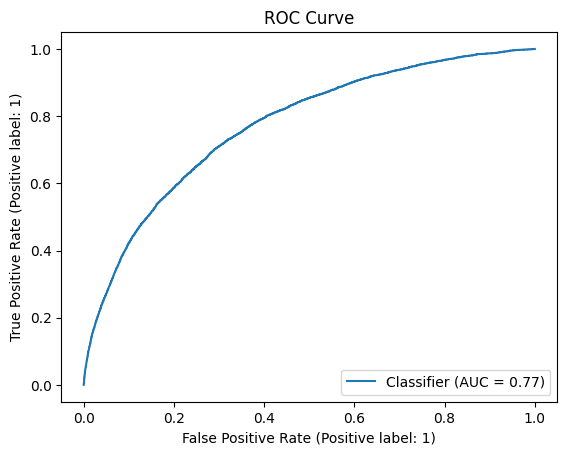

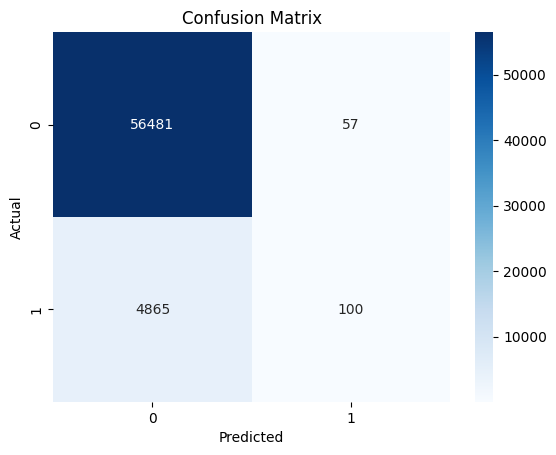

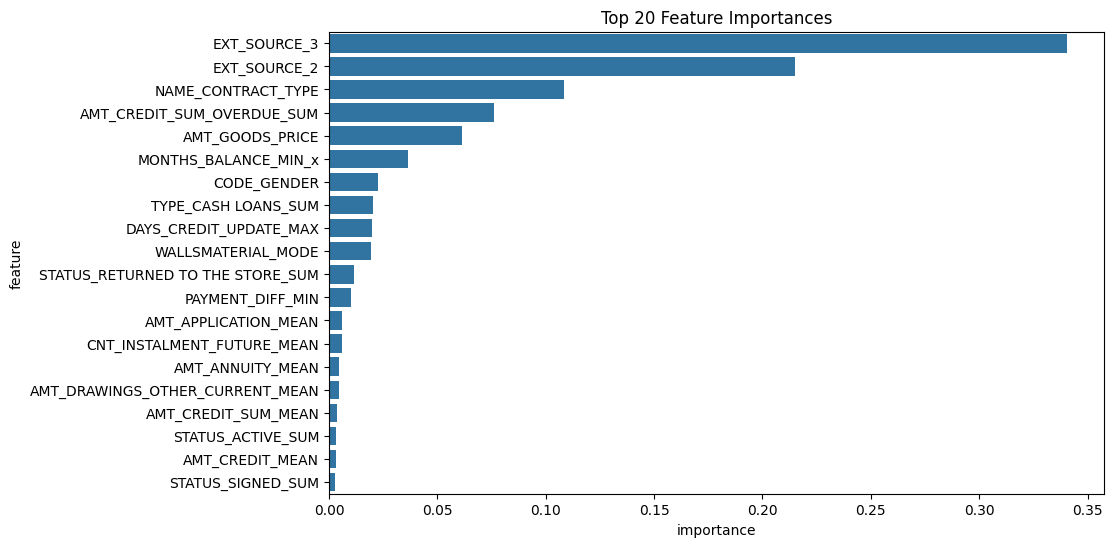

In [21]:
# Print basic metrics
print(f"Test AUC: {auc:.4f}")
print(f"Test Accuracy: {acc:.4f}")
print(f"Test F1 Score: {f1:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plot ROC Curve
RocCurveDisplay.from_predictions(y_test, y_pred_proba)
plt.title("ROC Curve")
plt.show()

# Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Plot feature importances (TabNet has this)

importances = clf.feature_importances_
feat_names = X_train.columns
imp_df = pd.DataFrame({'feature': feat_names, 'importance': importances})
imp_df = imp_df.sort_values(by="importance", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x="importance", y="feature", data=imp_df.head(20))
plt.title("Top 20 Feature Importances")
plt.show()


## Attack Implementation

### Covariate Perturbation

In [22]:
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, f1_score

def evaluate_covariate_perturbation(
    X_test,
    y_test,
    model,
    methods=['gaussian_noise'],
    noise_level=0.05,
    mask_prob=0.1,
    threshold=0.5,
    featurewise_std=False,
    feature_names=None,
    random_state=42,
    verbose=True,
    return_metrics=False
):
    rng = np.random.default_rng(random_state)
    Xp = X_test.copy()

    # Convert to numpy if needed
    X_vals = Xp.values if hasattr(Xp, 'values') else Xp
    y_vals = y_test.values if hasattr(y_test, 'values') else y_test

    for method in methods:
        if method == 'gaussian_noise':
            if featurewise_std and isinstance(Xp, pd.DataFrame):
                noise = np.zeros_like(X_vals)
                for i, col in enumerate(Xp.columns):
                    std = Xp[col].std()
                    noise[:, i] = rng.normal(0, noise_level * std, size=len(Xp))
            else:
                noise = rng.normal(0, noise_level, size=X_vals.shape)
            X_vals += noise

        elif method == 'feature_shift':
            X_vals *= (1 + noise_level)

        elif method == 'random_mask':
            mask = rng.binomial(1, 1 - mask_prob, size=X_vals.shape)
            X_vals *= mask

        else:
            raise ValueError(f"Unknown perturbation method: {method}")

    # Prediction and evaluation
    y_pred_proba = model.predict_proba(X_vals)[:, 1]
    y_pred = (y_pred_proba >= threshold).astype(int)

    if verbose:
        print(f"\nCovariate Perturbation: {methods}")
        print(f" - noise_level: {noise_level}, mask_prob: {mask_prob}")
        print(f" - threshold: {threshold}")
        print(classification_report(y_vals, y_pred, target_names=['Class 0', 'Class 1']))
        print(f"AUC-ROC: {roc_auc_score(y_vals, y_pred_proba):.4f}")

    # Prediction drift
    original_pred = model.predict(X_test.values if hasattr(X_test, 'values') else X_test)
    changes = np.sum(original_pred != y_pred)
    change_pct = changes / len(y_test) * 100

    if verbose:
        print(f"Prediction changes: {changes}/{len(y_test)} ({change_pct:.2f}%)")

    metrics = {
        "auc": roc_auc_score(y_vals, y_pred_proba),
        "accuracy": accuracy_score(y_vals, y_pred),
        "f1": f1_score(y_vals, y_pred),
        "pred_change_count": changes,
        "pred_change_pct": change_pct
    }

    if return_metrics:
        return metrics, X_vals
    else:
        return X_vals



In [23]:
# === Perturbation Results ===
X_cov_gauss = evaluate_covariate_perturbation(
    X_test, y_test, clf,
    methods=['gaussian_noise'],
    noise_level=0.05,
    verbose=True
)

X_cov_shift = evaluate_covariate_perturbation(
    X_test, y_test, clf,
    methods=['feature_shift'],
    noise_level=0.10,
    verbose=True
)

X_cov_mask = evaluate_covariate_perturbation(
    X_test, y_test, clf,
    methods=['random_mask'],
    mask_prob=0.15,
    verbose=True
)



Covariate Perturbation: ['gaussian_noise']
 - noise_level: 0.05, mask_prob: 0.1
 - threshold: 0.5
              precision    recall  f1-score   support

     Class 0       0.92      0.97      0.94     56538
     Class 1       0.15      0.06      0.09      4965

    accuracy                           0.89     61503
   macro avg       0.53      0.52      0.52     61503
weighted avg       0.86      0.89      0.87     61503

AUC-ROC: 0.5895
Prediction changes: 2256/61503 (3.67%)

Covariate Perturbation: ['feature_shift']
 - noise_level: 0.1, mask_prob: 0.1
 - threshold: 0.5
              precision    recall  f1-score   support

     Class 0       0.92      1.00      0.96     56538
     Class 1       0.58      0.01      0.02      4965

    accuracy                           0.92     61503
   macro avg       0.75      0.50      0.49     61503
weighted avg       0.89      0.92      0.88     61503

AUC-ROC: 0.7293
Prediction changes: 148/61503 (0.24%)

Covariate Perturbation: ['random_mask']


In [24]:
# --- 1. Perturb a single feature using a chosen method ---
def perturb_single_feature(X, feature, method, noise_level=0.05, mask_prob=0.15, random_state=42):
    rng = np.random.default_rng(random_state)
    X_perturbed = X.copy()

    if method == 'gaussian_noise':
        std = X[feature].std()
        noise = rng.normal(0, noise_level * std, size=X.shape[0])
        X_perturbed[feature] += noise

    elif method == 'feature_shift':
        shift = noise_level * X[feature].std()
        X_perturbed[feature] += shift

    elif method == 'random_mask':
        mask = rng.binomial(1, 1 - mask_prob, size=X.shape[0])
        X_perturbed[feature] = X[feature] * mask

    else:
        raise ValueError(f"Unknown method: {method}")

    return X_perturbed


# --- 2. Evaluate model performance after perturbing each feature individually ---
def evaluate_featurewise_perturbation(X_test, y_test, model, method='gaussian_noise', noise_level=0.05, mask_prob=0.15):
    # Safety check
    if not isinstance(X_test, pd.DataFrame):
        raise TypeError("X_test must be a pandas DataFrame with .columns")

    X_test = X_test.reset_index(drop=True)
    y_test = y_test.reset_index(drop=True)

    # Baseline prediction
    y_pred_base = model.predict(X_test.values)
    y_prob_base = model.predict_proba(X_test.values)[:, 1]
    
    baseline_metrics = {
        "accuracy": accuracy_score(y_test, y_pred_base),
        "f1": f1_score(y_test, y_pred_base),
        "auc": roc_auc_score(y_test, y_prob_base)
    }

    feature_impact = []

    for feature in X_test.columns:
        X_pert = perturb_single_feature(X_test, feature, method=method, noise_level=noise_level, mask_prob=mask_prob)

        y_prob_pert = model.predict_proba(X_pert.values)[:, 1]
        y_pred_pert = (y_prob_pert >= 0.5).astype(int)

        delta_acc = baseline_metrics['accuracy'] - accuracy_score(y_test, y_pred_pert)
        delta_f1 = baseline_metrics['f1'] - f1_score(y_test, y_pred_pert)
        delta_auc = baseline_metrics['auc'] - roc_auc_score(y_test, y_prob_pert)
        pred_change_pct = (y_pred_base != y_pred_pert).mean() * 100

        feature_impact.append({
            'feature': feature,
            'delta_accuracy': delta_acc,
            'delta_f1': delta_f1,
            'delta_auc': delta_auc,
            'pred_change_pct': pred_change_pct
        })

    df_impact = pd.DataFrame(feature_impact)
    df_impact.sort_values('delta_auc', ascending=False, inplace=True)
    return df_impact


def plot_top_features(df_impact, metric='delta_auc', top_n=10, title=None):
    df_top = df_impact.set_index('feature')[metric].sort_values(ascending=True).tail(top_n)
    df_top.plot(kind='barh', figsize=(8, 6))
    plt.xlabel(f'Change in {metric.upper()}')
    plt.title(title or f'Top {top_n} Features by {metric}')
    plt.tight_layout()
    plt.show()


In [25]:
feature_names = merged.drop(columns=['SK_ID_CURR', 'TARGET']).columns.tolist()
X_test_df = pd.DataFrame(X_test, columns=feature_names).reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# Run the evaluations
df_noise = evaluate_featurewise_perturbation(X_test_df, y_test, clf, method='gaussian_noise', noise_level=0.05)
df_shift = evaluate_featurewise_perturbation(X_test_df, y_test, clf, method='feature_shift', noise_level=0.10)
df_mask  = evaluate_featurewise_perturbation(X_test_df, y_test, clf, method='random_mask', mask_prob=0.15)


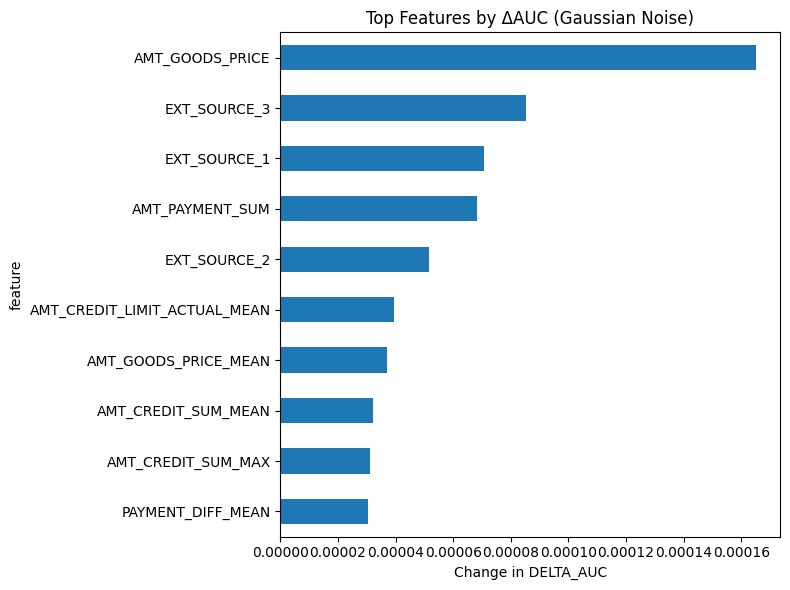

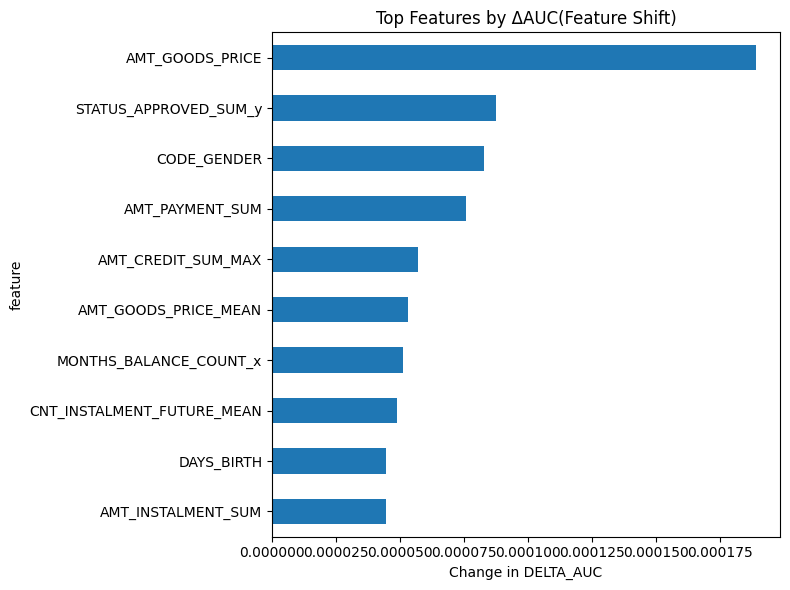

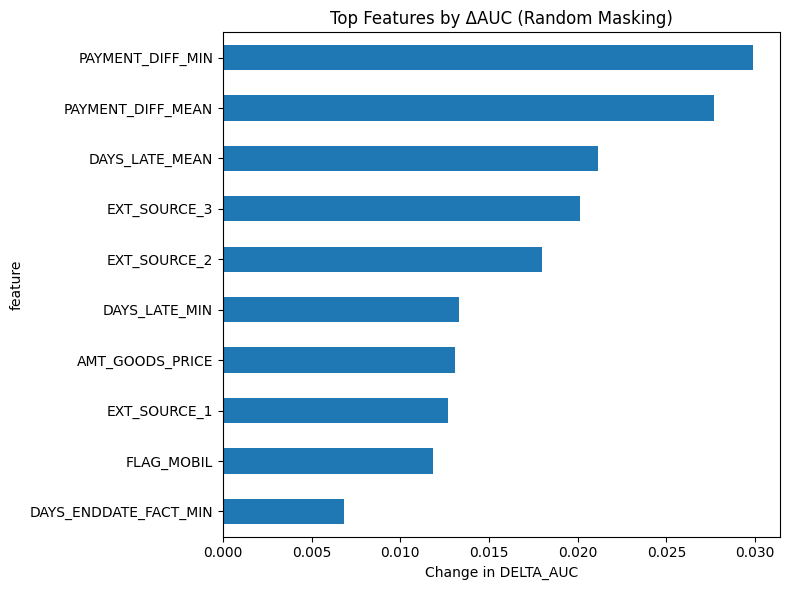

In [26]:
plot_top_features(df_noise, metric='delta_auc', title='Top Features by ΔAUC (Gaussian Noise)')
plot_top_features(df_shift, metric='delta_auc', title='Top Features by ΔAUC(Feature Shift)')
plot_top_features(df_mask, metric='delta_auc', title='Top Features by ΔAUC (Random Masking)')


### L₀-Constrained Adversarial Attacks: Mathematical Overview

1.  Gradient-Based L₀ Attack

Objective

For a given model $f$ and input $x_i$ with label $y_i$, we aim to construct an adversarial sample $\tilde{x}_i$ such that:

- Perturb only the **top-k most influential features** (via gradient magnitude).
- Increase the cross-entropy loss:
  
  $$
  \mathcal{L}(y_i, f(\tilde{x}_i)) > \mathcal{L}(y_i, f(x_i))
  $$

- Subject to:

  $$
  \|\tilde{x}_i - x_i\|_0 \leq k
  $$

Method

1. Compute the gradient of loss with respect to input:
  
   $$
   g_i = \nabla_{x_i} \mathcal{L}(y_i, f(x_i))
   $$

2. Select top-$k$ features with the largest absolute gradient:

   $$
   \mathcal{I}_i = \text{TopK}_j(|g_{i,j}|)
   $$

3. Apply sign-based perturbation:

   $$
   \tilde{x}_i^{(j)} = x_i^{(j)} + \epsilon \cdot \text{sign}(g_{i,j}), \quad \text{for } j \in \mathcal{I}_i
   $$


2.  Loss-Sensitive L₀ Attack

Objective

Instead of using gradients, this method evaluates how **sensitive the loss is to each feature**, then perturbs those with the **highest loss impact**.

Goal:

- Maximize the loss:

  $$
  \mathcal{L}(y_i, f(\tilde{x}_i)) > \mathcal{L}(y_i, f(x_i))
  $$

- Perturb no more than $k$ features:
  
  $$
  \|\tilde{x}_i - x_i\|_0 \leq k
  $$

Method

1. For each feature $j$, simulate noise perturbation:
  
   $$
   x_i^{(j)} = x_i + z_j e_j, \quad z_j \sim \mathcal{N}(0, \epsilon)
   $$

2. Compute loss increase from perturbation:
  
   $$
   \Delta_j = \mathcal{L}(y_i, f(x_i^{(j)})) - \mathcal{L}(y_i, f(x_i))
   $$

3. Select top-$k$ features:

   $$
   \mathcal{I}_i = \text{TopK}_j(\Delta_j)
   $$

4. Perturb those features with small Gaussian noise:

   $$
   \tilde{x}_i = x_i + \sum_{j \in \mathcal{I}_i} \eta_j e_j, \quad \eta_j \sim \mathcal{N}(0, \epsilon)
   $$

Common Notes

- **Cross-Entropy Loss** for binary classification:

  $$
  \mathcal{L}(y, \hat{y}) = -\left[ y \log(\hat{y} + \delta) + (1 - y)\log(1 - \hat{y} + \delta) \right]
  $$

- Both methods return:
  - `X_adv`: adversarially perturbed inputs.
  - `saliency_log`: list of perturbed (top-k) features for each input.


In [27]:
# 1. Gradient-Based L0 Attack
def gradient_topk_l0_attack(
    model,
    X: np.ndarray,
    y: np.ndarray,
    epsilon: float = 0.1,
    max_features: int = 5,
    feature_names=None
):
    device = next(model.parameters()).device
    model.eval()

    X_tensor = torch.tensor(X.astype(np.float32), requires_grad=True, device=device)
    y_tensor = torch.tensor(y.astype(np.int64), device=device)

    logits, _ = model(X_tensor)
    loss = torch.nn.functional.cross_entropy(logits, y_tensor)
    loss.backward()

    grads = X_tensor.grad.detach().cpu().numpy()
    X_adv = X.copy()
    saliency_log = []

    for i in range(X.shape[0]):
        grad_i = grads[i]
        topk = np.argsort(np.abs(grad_i))[-max_features:]
        top_features = [feature_names[j] for j in topk] if feature_names else topk.tolist()
        saliency_log.append(top_features)
        X_adv[i, topk] += epsilon * np.sign(grad_i[topk])

    return X_adv, saliency_log


# 2. Loss-Sensitive L0 Attack
def loss_sensitive_l0_attack(
    model,
    X_df: pd.DataFrame,
    y: np.ndarray,
    max_features: int = 5,
    epsilon: float = 0.1,
    batch_size: int = 512
):
    X_vals = X_df.values
    feature_names = list(X_df.columns)
    n_samples, n_features = X_vals.shape

    X_adv = X_vals.copy()
    saliency_log = []

    eps = 1e-8
    y_proba_orig = model.predict_proba(X_vals)[:, 1]
    base_loss = -(
        y * np.log(y_proba_orig + eps) + (1 - y) * np.log(1 - y_proba_orig + eps)
    )

    for i in range(n_samples):
        x = X_vals[i].copy()
        x_repeat = np.tile(x, (n_features, 1))
        noise = np.random.normal(0, epsilon, size=n_features)
        for j in range(n_features):
            x_repeat[j, j] += noise[j]

        perturbed_probs = model.predict_proba(x_repeat)[:, 1]
        perturbed_loss = -(
            y[i] * np.log(perturbed_probs + eps) + (1 - y[i]) * np.log(1 - perturbed_probs + eps)
        )

        loss_deltas = perturbed_loss - base_loss[i]
        topk = np.argsort(loss_deltas)[-max_features:]
        top_features = [feature_names[j] for j in topk]
        saliency_log.append(top_features)

        for j in topk:
            X_adv[i, j] += np.random.normal(0, epsilon)

    return X_adv, saliency_log


# 3. Evaluation
def evaluate_attack(X_adv, y_true, model, label="Attack", threshold=0.5):
    y_proba = model.predict_proba(X_adv)[:, 1]
    y_pred = (y_proba >= threshold).astype(int)

    auc = roc_auc_score(y_true, y_proba)
    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print(f"\n[{label}] Evaluation")
    print(f"AUC:       {auc:.4f}")
    print(f"Accuracy:  {acc:.4f}")
    print(f"F1 Score:  {f1:.4f}")
    print(classification_report(y_true, y_pred, target_names=["Class 0", "Class 1"]))

    return {"auc": auc, "accuracy": acc, "f1": f1}


# 4. Run Both Attacks
assert isinstance(X_test, pd.DataFrame)
X_np = X_test.values
y_np = y_test.values if hasattr(y_test, 'values') else y_test
feature_names = list(X_test.columns)

# Gradient-Based L0 Attack
X_grad_adv, grad_features = gradient_topk_l0_attack(
    model=clf.network,
    X=X_np,
    y=y_np,
    epsilon=0.1,
    max_features=5,
    feature_names=feature_names
)
evaluate_attack(X_grad_adv, y_np, clf, label="Gradient-Based L0 Attack")

# Loss-Sensitive L0 Attack
X_loss_adv, loss_features = loss_sensitive_l0_attack(
    model=clf,
    X_df=X_test,
    y=y_np,
    max_features=5,
    epsilon=0.1
)
evaluate_attack(X_loss_adv, y_np, clf, label="Loss-Based L0 Attack")



[Gradient-Based L0 Attack] Evaluation
AUC:       0.0668
Accuracy:  0.8597
F1 Score:  0.0117
              precision    recall  f1-score   support

     Class 0       0.91      0.93      0.92     56538
     Class 1       0.01      0.01      0.01      4965

    accuracy                           0.86     61503
   macro avg       0.46      0.47      0.47     61503
weighted avg       0.84      0.86      0.85     61503


[Loss-Based L0 Attack] Evaluation
AUC:       0.4593
Accuracy:  0.8645
F1 Score:  0.0390
              precision    recall  f1-score   support

     Class 0       0.92      0.94      0.93     56538
     Class 1       0.05      0.03      0.04      4965

    accuracy                           0.86     61503
   macro avg       0.48      0.49      0.48     61503
weighted avg       0.85      0.86      0.86     61503



{'auc': 0.45930563254750423,
 'accuracy': 0.8644781555371283,
 'f1': 0.03897152081171451}

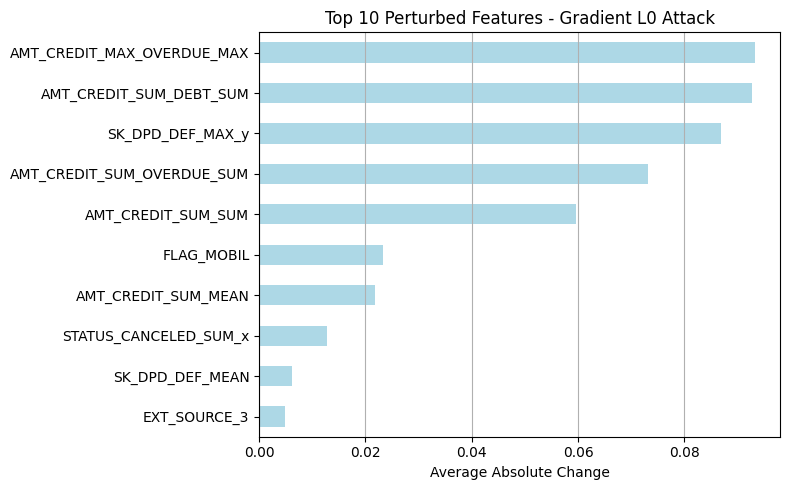

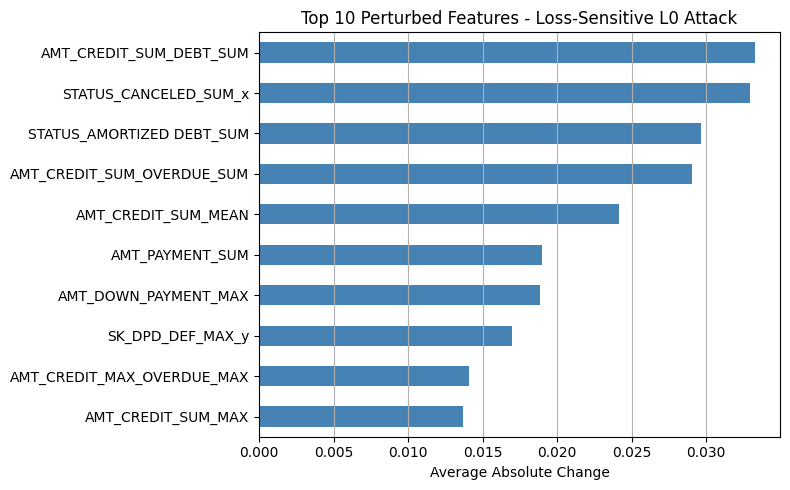

In [28]:
# Difference (perturbation magnitude)
diff_grad = np.abs(X_grad_adv - X_np)
diff_loss = np.abs(X_loss_adv - X_np)

# Mean change per feature
mean_grad_diff = pd.Series(diff_grad.mean(axis=0), index=feature_names)
mean_loss_diff = pd.Series(diff_loss.mean(axis=0), index=feature_names)

# === Plot for Gradient-Based L0 ===
plt.figure(figsize=(8, 5))
mean_grad_diff.sort_values(ascending=False).head(10).plot(kind='barh', color='lightblue')
plt.title("Top 10 Perturbed Features - Gradient L0 Attack")
plt.xlabel("Average Absolute Change")
plt.gca().invert_yaxis()
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()

# === Plot for Loss-Sensitive L0 ===
plt.figure(figsize=(8, 5))
mean_loss_diff.sort_values(ascending=False).head(10).plot(kind='barh', color='steelblue')
plt.title("Top 10 Perturbed Features - Loss-Sensitive L0 Attack")
plt.xlabel("Average Absolute Change")
plt.gca().invert_yaxis()
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()


###  L₂-Norm Constrained Adversarial Attacks


 1.  FGSM-L2 Attack (Fast Gradient Sign Method under L2)

  Objective

For an input $x_i$ and label $y_i$, generate an adversarial example $\tilde{x}_i$ such that:

- The prediction loss increases:

  $$
  \mathcal{L}(y_i, f(\tilde{x}_i)) > \mathcal{L}(y_i, f(x_i))
  $$

- The perturbation is bounded under the $L_2$ norm:

  $$
  \|\tilde{x}_i - x_i\|_2 \leq \epsilon
  $$

  Method

1. Compute the gradient of the loss with respect to input:

   $$
   g_i = \nabla_{x_i} \mathcal{L}(y_i, f(x_i))
   $$

2. Normalize the gradient:

   $$
   \hat{g}_i = \frac{g_i}{\|g_i\|_2 + \delta}
   $$

3. Generate the adversarial sample:

   $$
   \tilde{x}_i = x_i + \epsilon \cdot \hat{g}_i
   $$

Here, $\delta$ is a small constant (e.g., $10^{-8}$) to prevent division by zero.



 2.  PGD-L2 Attack (Projected Gradient Descent under L2)

  Objective

Same goal as FGSM-L2, but uses **iterative gradient steps** for stronger adversarial examples.

  Method

Start from the original input and repeat:

1. Compute the gradient:

   $$
   g_i^{(t)} = \nabla_{x_i^{(t)}} \mathcal{L}(y_i, f(x_i^{(t)}))
   $$

2. Normalize:

   $$
   \hat{g}_i^{(t)} = \frac{g_i^{(t)}}{\|g_i^{(t)}\|_2 + \delta}
   $$

3. Take a small step:

   $$
   x_i^{(t+1)} = x_i^{(t)} + \alpha \cdot \hat{g}_i^{(t)}
   $$

4. **Project** the result back to the L2 ball of radius $\epsilon$ around the original input:

   $$
   \delta_i^{(t+1)} = x_i^{(t+1)} - x_i \\
   \text{if } \|\delta_i^{(t+1)}\|_2 > \epsilon, \text{ scale: } \delta_i^{(t+1)} \leftarrow \frac{\epsilon}{\|\delta_i^{(t+1)}\|_2} \cdot \delta_i^{(t+1)} \\
   \tilde{x}_i^{(t+1)} = x_i + \delta_i^{(t+1)}
   $$

Repeat for a fixed number of iterations (`iters`).



Evaluation

After generating adversarial examples $\tilde{X}$, evaluate the model on:

- **AUC (Area Under Curve)**
- **Accuracy**
- **F1 Score**
- **Classification Report**

To measure how successful the attack was at degrading the model's performance.



Summary

| Attack     | Strength      | Perturbation Type | Norm Constraint |
|------------|---------------|-------------------|------------------|
| FGSM-L2    | Fast (1-step) | Directional noise | $L_2 \leq \epsilon$ |
| PGD-L2     | Stronger (multi-step) | Iterative projection | $L_2 \leq \epsilon$ |



  Notes

- Both methods require gradient access (white-box).
- L2-normalization ensures perturbations are balanced across features.
- PGD is a stronger attack due to iterative refinement and projection.




In [29]:
# --- 1. FGSM-L2 Attack ---
def fgsm_l2_attack(
    model,
    X: np.ndarray,
    y: np.ndarray,
    epsilon: float = 3.0
):
    model.eval()
    X_tensor = torch.tensor(X.astype(np.float32), requires_grad=True)
    y_tensor = torch.tensor(y.astype(np.int64))

    logits, _ = model(X_tensor)
    loss = torch.nn.functional.cross_entropy(logits, y_tensor)
    loss.backward()

    grad = X_tensor.grad.detach().cpu().numpy()

    # Normalize gradient to unit L2 norm per sample
    grad_norm = np.linalg.norm(grad, axis=1, keepdims=True) + 1e-8
    perturb = epsilon * grad / grad_norm

    X_adv = X + perturb
    return X_adv

# --- 2. PGD-L2 Attack ---
def pgd_l2_attack(
    model,
    X: np.ndarray,
    y: np.ndarray,
    epsilon: float = 3.0,
    alpha: float = 0.5,
    iters: int = 10
):
    model.eval()

    # Force float32 dtype
    X_tensor = torch.tensor(X, dtype=torch.float32)
    y_tensor = torch.tensor(y, dtype=torch.long)

    X_adv = X_tensor.clone().detach().requires_grad_(True)

    for _ in range(iters):
        logits, _ = model(X_adv)
        loss = torch.nn.functional.cross_entropy(logits, y_tensor)
        loss.backward()

        grad = X_adv.grad.detach()

        # Normalize gradient (L2 norm per sample)
        grad_norm = torch.norm(grad, p=2, dim=1, keepdim=True) + 1e-8
        grad_unit = grad / grad_norm

        X_adv = X_adv + alpha * grad_unit

        # Project back into L2 ball
        delta = X_adv - X_tensor
        delta_norm = torch.norm(delta, p=2, dim=1, keepdim=True).clamp(min=1e-8)
        factor = torch.clamp(epsilon / delta_norm, max=1.0)
        delta = delta * factor

        X_adv = (X_tensor + delta).detach().requires_grad_(True)

    return X_adv.detach().cpu().numpy()

# --- 3. Evaluation ---
def evaluate_attack(X_adv, y_true, model, label="Attack", threshold=0.5):
    y_proba = model.predict_proba(X_adv)[:, 1]
    y_pred = (y_proba >= threshold).astype(int)

    auc = roc_auc_score(y_true, y_proba)
    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print(f"\n[{label}] Evaluation")
    print(f"AUC:       {auc:.4f}")
    print(f"Accuracy:  {acc:.4f}")
    print(f"F1 Score:  {f1:.4f}")
    print(classification_report(y_true, y_pred, target_names=["Class 0", "Class 1"]))

    return {"auc": auc, "accuracy": acc, "f1": f1}

# --- 4. Usage Example (Drop-In) ---
assert isinstance(X_test, pd.DataFrame)
X_np = X_test.values
y_np = y_test.values if hasattr(y_test, 'values') else y_test

# FGSM-L2
X_fgsm_adv = fgsm_l2_attack(
    model=clf.network,
    X=X_np,
    y=y_np,
    epsilon=3.0
)
evaluate_attack(X_fgsm_adv, y_np, clf, label="FGSM L2 Attack")

# PGD-L2
X_pgd_adv = pgd_l2_attack(
    model=clf.network,
    X=X_np,
    y=y_np,
    epsilon=3.0,
    alpha=0.5,
    iters=10
)
evaluate_attack(X_pgd_adv, y_np, clf, label="PGD L2 Attack")



[FGSM L2 Attack] Evaluation
AUC:       0.6071
Accuracy:  0.7386
F1 Score:  0.1853
              precision    recall  f1-score   support

     Class 0       0.93      0.77      0.84     56538
     Class 1       0.12      0.37      0.19      4965

    accuracy                           0.74     61503
   macro avg       0.53      0.57      0.51     61503
weighted avg       0.87      0.74      0.79     61503


[PGD L2 Attack] Evaluation
AUC:       0.1383
Accuracy:  0.2122
F1 Score:  0.0296
              precision    recall  f1-score   support

     Class 0       0.74      0.22      0.34     56538
     Class 1       0.02      0.15      0.03      4965

    accuracy                           0.21     61503
   macro avg       0.38      0.18      0.18     61503
weighted avg       0.69      0.21      0.31     61503



{'auc': 0.13828731325511556,
 'accuracy': 0.21216851210510057,
 'f1': 0.029561385940316445}

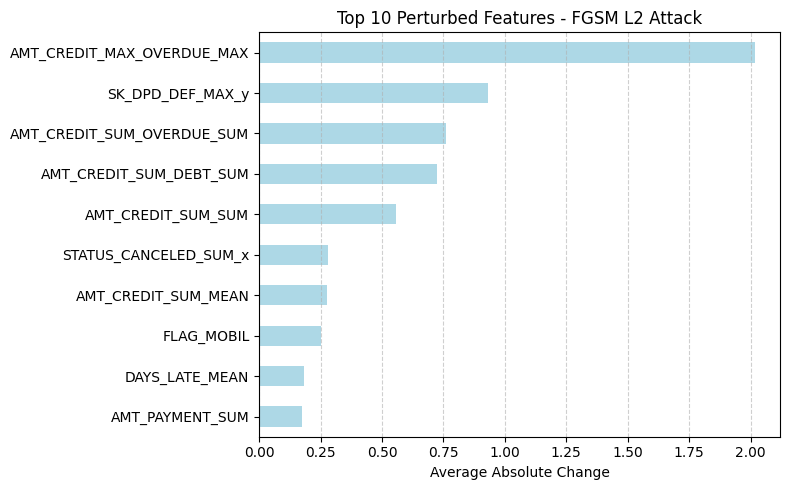

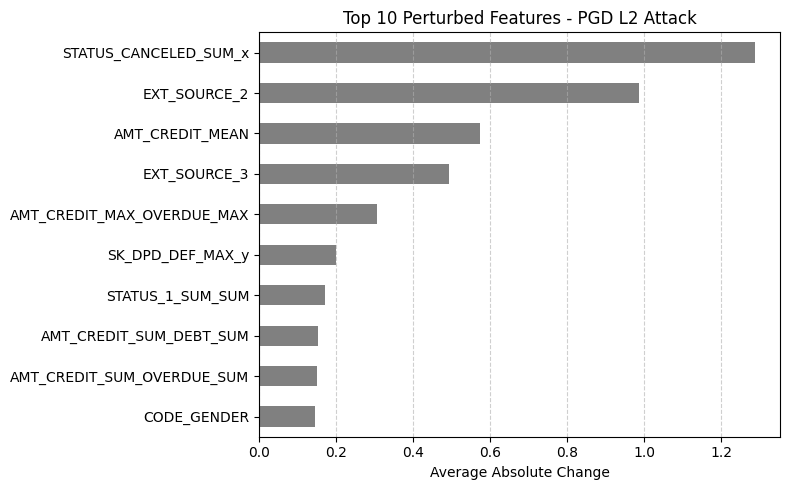

In [30]:
# === Difference (L2 perturbation magnitude) ===
diff_fgsm_l2 = np.abs(X_fgsm_adv - X_np)
diff_pgd_l2 = np.abs(X_pgd_adv - X_np)

# === Mean change per feature ===
mean_fgsm_l2 = pd.Series(diff_fgsm_l2.mean(axis=0), index=feature_names)
mean_pgd_l2 = pd.Series(diff_pgd_l2.mean(axis=0), index=feature_names)

# === Plot: FGSM L2 ===
plt.figure(figsize=(8, 5))
mean_fgsm_l2.sort_values(ascending=False).head(10).plot(
    kind='barh', color='lightblue'
)
plt.title("Top 10 Perturbed Features - FGSM L2 Attack")
plt.xlabel("Average Absolute Change")
plt.gca().invert_yaxis()
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# === Plot: PGD L2 ===
plt.figure(figsize=(8, 5))
mean_pgd_l2.sort_values(ascending=False).head(10).plot(
    kind='barh', color='grey'
)
plt.title("Top 10 Perturbed Features - PGD L2 Attack")
plt.xlabel("Average Absolute Change")
plt.gca().invert_yaxis()
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


###  L∞-Norm Constrained Adversarial Attacks


 1.  FGSM L∞ Attack (Fast Gradient Sign Method)

  Objective

Craft adversarial examples $\tilde{x}_i$ such that:

- The model’s loss increases:

  $$
  \mathcal{L}(y_i, f(\tilde{x}_i)) > \mathcal{L}(y_i, f(x_i))
  $$

- Each feature-wise change is bounded by $\epsilon$:

  $$
  \|\tilde{x}_i - x_i\|_\infty \leq \epsilon
  $$

  Method

1. Compute the gradient of the loss:

   $$
   g_i = \nabla_{x_i} \mathcal{L}(y_i, f(x_i))
   $$

2. Take a step in the **sign direction** of the gradient:

   $$
   \tilde{x}_i = x_i + \epsilon \cdot \text{sign}(g_i)
   $$

This generates a **fast, one-step** perturbation.


 2.  PGD L∞ Attack (Projected Gradient Descent)

Objective

Same as FGSM-L∞ but performs **multiple iterative updates** and projects the result back to the $L_\infty$ ball.

  Method

Let $x_i^{(0)} = x_i$. For each step $t = 0, \dots, T-1$:

1. Compute the gradient:

   $$
   g_i^{(t)} = \nabla_{x_i^{(t)}} \mathcal{L}(y_i, f(x_i^{(t)}))
   $$

2. Apply sign-based update:

   $$
   x_i^{(t+1)} = x_i^{(t)} + \alpha \cdot \text{sign}(g_i^{(t)})
   $$

3. **Project** back into the $L_\infty$ ball around $x_i$:

   $$
   x_i^{(t+1)} = \text{clip}\left(x_i^{(t+1)}, x_i - \epsilon, x_i + \epsilon\right)
   $$

Final output:

$$
\tilde{x}_i = x_i^{(T)}
$$

This iterative approach creates **stronger adversarial examples**.


Evaluation

For any attack $\tilde{X}$, evaluate model performance:

- **AUC** (Area Under ROC Curve)
- **Accuracy**
- **F1 Score**

Optionally print full **classification report**.

Summary

| Attack     | Iterative | Perturbation Type  | Norm Constraint     |
|------------|-----------|---------------------|----------------------|
| FGSM-L∞    |  (1-step) | Sign(grad)          | $L_\infty \leq \epsilon$ |
| PGD-L∞     |  (multi-step) | Projected updates  | $L_\infty \leq \epsilon$ |


 Notes

- Both attacks assume **white-box access** (gradients from model).
- $L_\infty$ constraints ensure **bounded per-feature change**.
- PGD is a **stronger adversary**, often used for robustness testing (e.g., adversarial training).


In [31]:
# 1. FGSM L∞ Attack
def fgsm_linf_attack(model, X, y, epsilon=0.1):
    model.eval()
    X_tensor = torch.tensor(X.astype(np.float32), requires_grad=True)
    y_tensor = torch.tensor(y.astype(np.int64))

    logits, _ = model(X_tensor)
    loss = torch.nn.functional.cross_entropy(logits, y_tensor)
    loss.backward()

    # sign(grad) scaled by epsilon
    grad = X_tensor.grad.data
    perturb = epsilon * torch.sign(grad)
    X_adv = X_tensor + perturb

    return X_adv.detach().cpu().numpy()

# 2. PGD L∞ Attack
def pgd_linf_attack(model, X, y, epsilon=0.1, alpha=0.02, iters=10):
    model.eval()
    X_tensor = torch.tensor(X.astype(np.float32))
    y_tensor = torch.tensor(y.astype(np.int64))

    X_adv = X_tensor.clone().detach()
    X_adv.requires_grad = True

    for _ in range(iters):
        logits, _ = model(X_adv)
        loss = torch.nn.functional.cross_entropy(logits, y_tensor)
        loss.backward()

        # FGSM step
        grad = X_adv.grad.data
        X_adv = X_adv + alpha * torch.sign(grad)

        # Project back to L-inf epsilon ball
        X_adv = torch.max(torch.min(X_adv, X_tensor + epsilon), X_tensor - epsilon)
        X_adv = X_adv.detach().requires_grad_()

    return X_adv.detach().cpu().numpy()

# 3. Evaluation
def evaluate_attack(X_adv, y_true, model, label="Attack", threshold=0.5):
    y_proba = model.predict_proba(X_adv)[:, 1]
    y_pred = (y_proba >= threshold).astype(int)

    auc = roc_auc_score(y_true, y_proba)
    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print(f"\n[{label}] Evaluation")
    print(f"AUC:       {auc:.4f}")
    print(f"Accuracy:  {acc:.4f}")
    print(f"F1 Score:  {f1:.4f}")
    print(classification_report(y_true, y_pred, target_names=["Class 0", "Class 1"]))

# 4. Run L∞ Attacks
X_np = X_test.values
y_np = y_test.values if hasattr(y_test, 'values') else y_test

# FGSM L∞
X_fgsm_linf = fgsm_linf_attack(
    model=clf.network,
    X=X_np,
    y=y_np,
    epsilon=0.1
)
evaluate_attack(X_fgsm_linf, y_np, clf, label="FGSM L∞ Attack")

# PGD L∞
X_pgd_linf = pgd_linf_attack(
    model=clf.network,
    X=X_np,
    y=y_np,
    epsilon=0.1,
    alpha=0.02,
    iters=10
)
evaluate_attack(X_pgd_linf, y_np, clf, label="PGD L∞ Attack")



[FGSM L∞ Attack] Evaluation
AUC:       0.0766
Accuracy:  0.3037
F1 Score:  0.0034
              precision    recall  f1-score   support

     Class 0       0.79      0.33      0.46     56538
     Class 1       0.00      0.01      0.00      4965

    accuracy                           0.30     61503
   macro avg       0.40      0.17      0.23     61503
weighted avg       0.73      0.30      0.43     61503


[PGD L∞ Attack] Evaluation
AUC:       0.0033
Accuracy:  0.2987
F1 Score:  0.0003
              precision    recall  f1-score   support

     Class 0       0.79      0.32      0.46     56538
     Class 1       0.00      0.00      0.00      4965

    accuracy                           0.30     61503
   macro avg       0.39      0.16      0.23     61503
weighted avg       0.72      0.30      0.42     61503



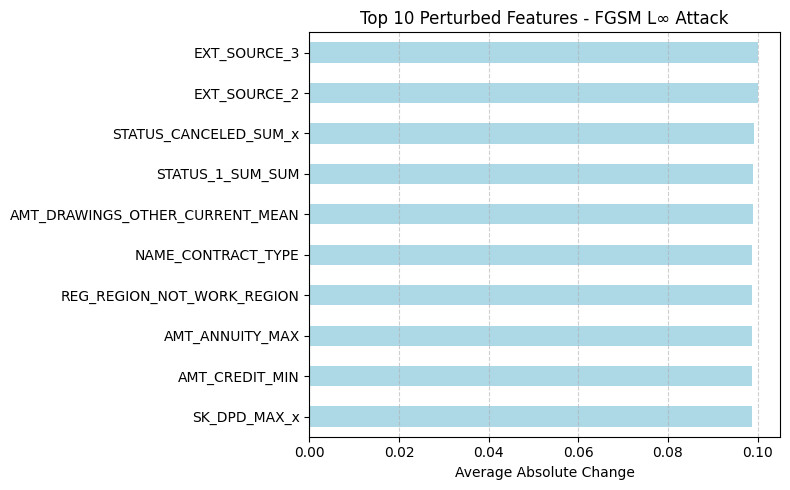

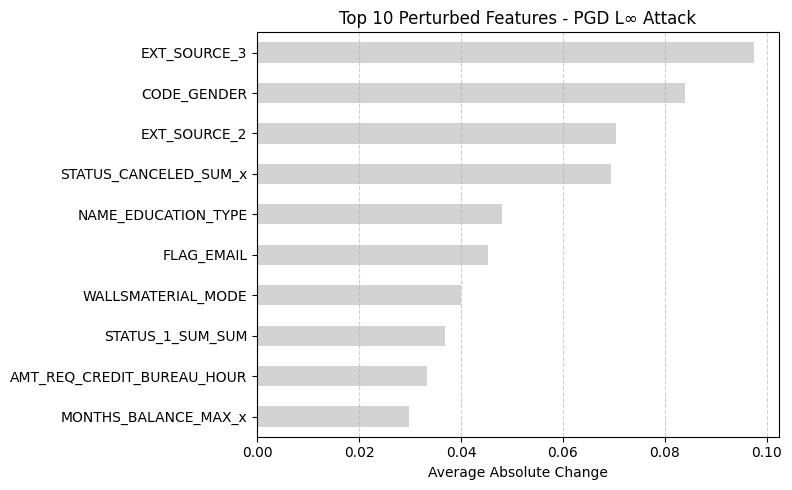

In [32]:
# === Difference (L∞ perturbation magnitude) ===
diff_fgsm_linf = np.abs(X_fgsm_linf - X_np)
diff_pgd_linf = np.abs(X_pgd_linf - X_np)

# === Mean change per feature ===
mean_fgsm_linf = pd.Series(diff_fgsm_linf.mean(axis=0), index=feature_names)
mean_pgd_linf = pd.Series(diff_pgd_linf.mean(axis=0), index=feature_names)

# === Plot: FGSM L∞ ===
plt.figure(figsize=(8, 5))
mean_fgsm_linf.sort_values(ascending=False).head(10).plot(
    kind='barh', color='lightblue')
plt.title("Top 10 Perturbed Features - FGSM L∞ Attack")
plt.xlabel("Average Absolute Change")
plt.gca().invert_yaxis()
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# === Plot: PGD L∞ ===
plt.figure(figsize=(8, 5))
mean_pgd_linf.sort_values(ascending=False).head(10).plot(
    kind='barh', color='lightgrey'
)
plt.title("Top 10 Perturbed Features - PGD L∞ Attack")
plt.xlabel("Average Absolute Change")
plt.gca().invert_yaxis()
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### All ROC Curves Together (Including Clean Test Set)

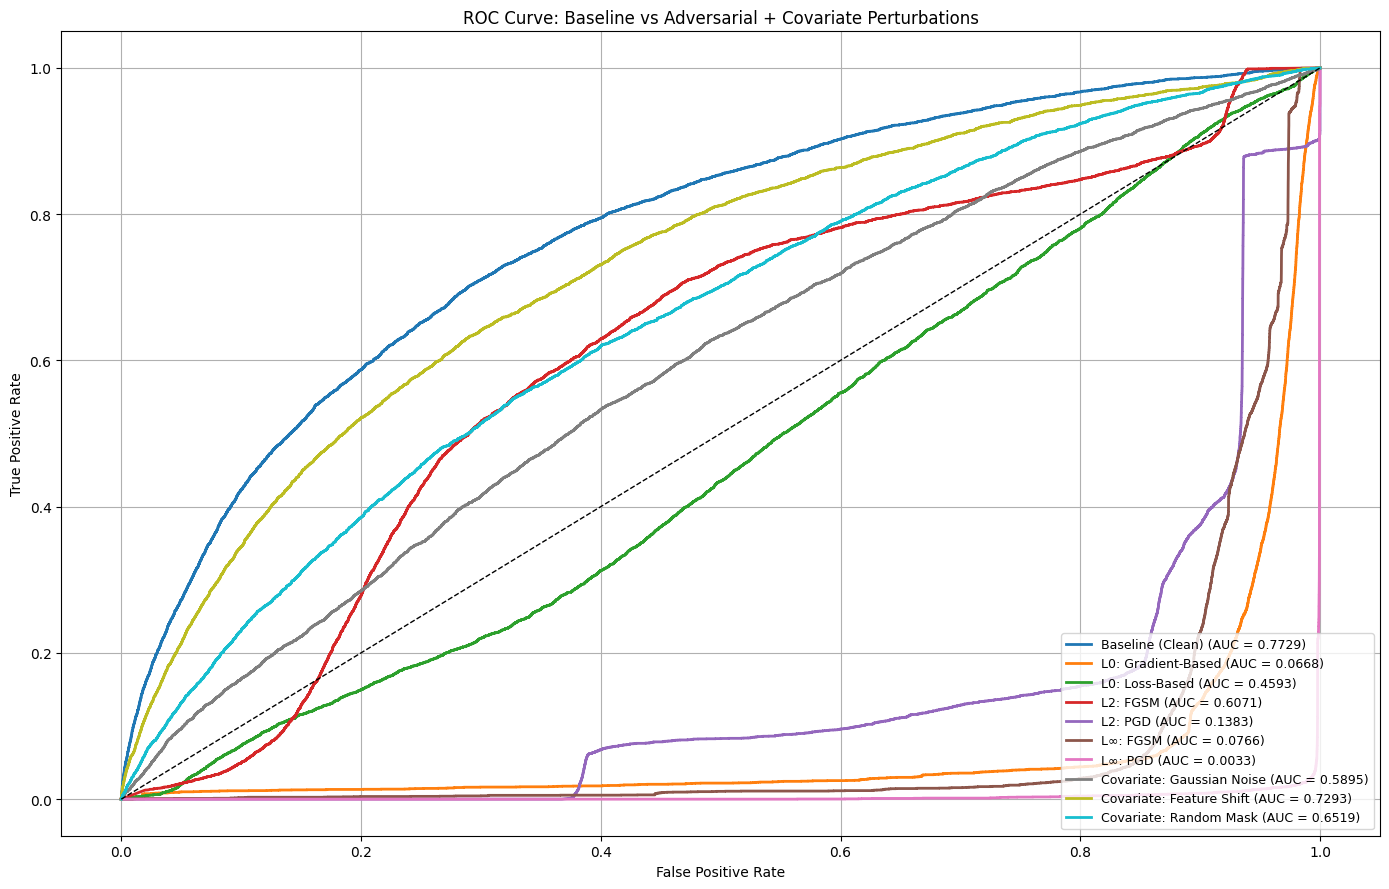

In [33]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Ensure correct format
y_true = y_test.values if hasattr(y_test, 'values') else y_test

# === Generate predictions ===
try:
    y_base = clf.predict_proba(X_test.values)[:, 1]
    y_grad_l0 = clf.predict_proba(X_grad_adv)[:, 1]
    y_loss_l0 = clf.predict_proba(X_loss_adv)[:, 1]
    y_fgsm_l2 = clf.predict_proba(X_fgsm_adv)[:, 1]
    y_pgd_l2 = clf.predict_proba(X_pgd_adv)[:, 1]
    y_fgsm_linf = clf.predict_proba(X_fgsm_linf)[:, 1]
    y_pgd_linf = clf.predict_proba(X_pgd_linf)[:, 1]
    y_cov_gauss = clf.predict_proba(X_cov_gauss)[:, 1]
    y_cov_shift = clf.predict_proba(X_cov_shift)[:, 1]
    y_cov_mask = clf.predict_proba(X_cov_mask)[:, 1]
except Exception as e:
    raise RuntimeError(f"Error during predict_proba: {e}")

# === Store all predictions ===
roc_results = {
    "Baseline (Clean)": y_base,
    "L0: Gradient-Based": y_grad_l0,
    "L0: Loss-Based": y_loss_l0,
    "L2: FGSM": y_fgsm_l2,
    "L2: PGD": y_pgd_l2,
    "L∞: FGSM": y_fgsm_linf,
    "L∞: PGD": y_pgd_linf,
    "Covariate: Gaussian Noise": y_cov_gauss,
    "Covariate: Feature Shift": y_cov_shift,
    "Covariate: Random Mask": y_cov_mask
}

# === Plot ROC Curves ===
plt.figure(figsize=(14, 9))

for label, y_scores in roc_results.items():
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    auc = roc_auc_score(y_true, y_scores)
    plt.plot(fpr, tpr, lw=2, label=f"{label} (AUC = {auc:.4f})")

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve: Baseline vs Adversarial + Covariate Perturbations")
plt.legend(loc="lower right", fontsize=9)
plt.grid(True)
plt.tight_layout()
plt.show()


# Extreme Gradient Boosting

=== Classification Report ===
              precision    recall  f1-score   support

     Class 0       0.92      0.99      0.96     56538
     Class 1       0.49      0.06      0.11      4965

    accuracy                           0.92     61503
   macro avg       0.71      0.53      0.53     61503
weighted avg       0.89      0.92      0.89     61503

AUC-ROC Score: 0.7676


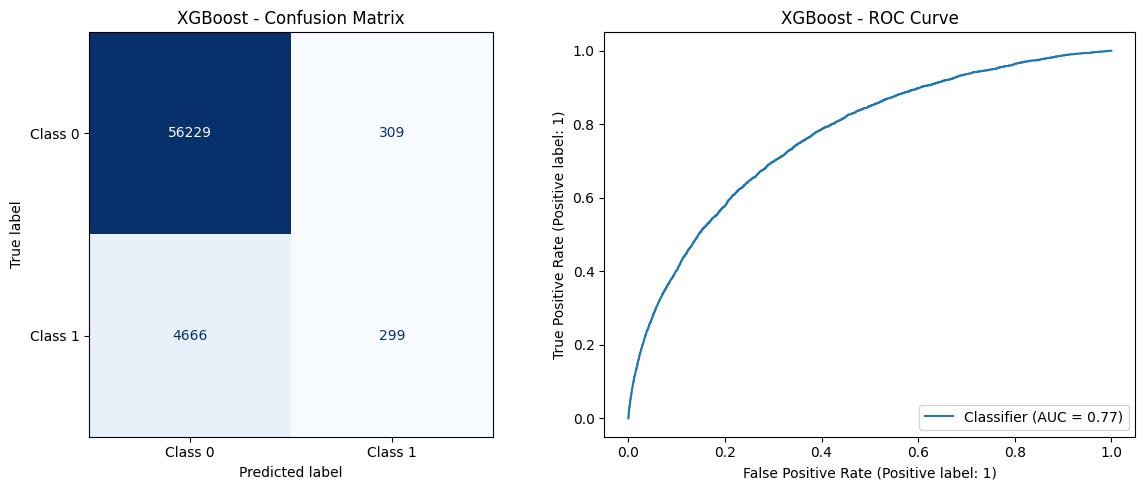

In [34]:
from xgboost import XGBClassifier
from sklearn.metrics import (
    classification_report, 
    roc_auc_score, 
    ConfusionMatrixDisplay, 
    RocCurveDisplay
)
import matplotlib.pyplot as plt

# === 1. Instantiate XGBoost Classifier ===
xgb_model = XGBClassifier(
    n_estimators=9999,            
    learning_rate=0.03,         
    max_depth=6,                
    subsample=0.8,
    colsample_bytree=0.8,
    objective='binary:logistic',
    eval_metric='auc',
    reg_alpha=1,                 # L1
    reg_lambda=1,                # L2
    random_state=SEED,
    n_jobs=-1,
    tree_method='hist',          
)

# === 2. Train the Model ===
xgb_model.fit(X_train, y_train)

# === 3. Make Predictions on Test Set ===
y_pred_test = xgb_model.predict(X_test)
y_pred_proba_test = xgb_model.predict_proba(X_test)[:, 1]

# === 4. Evaluation Metrics ===
print("=== Classification Report ===")
print(classification_report(
    y_test, y_pred_test, 
    target_names=["Class 0", "Class 1"]
))

auc_score = roc_auc_score(y_test, y_pred_proba_test)
print(f"AUC-ROC Score: {auc_score:.4f}")

# === 5. Visualization: Confusion Matrix and ROC Curve ===
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# 5.1 Confusion Matrix
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_test,
    display_labels=["Class 0", "Class 1"],
    cmap='Blues',
    colorbar=False,
    ax=axes[0]
)
axes[0].set_title("XGBoost - Confusion Matrix")

# 5.2 ROC Curve
RocCurveDisplay.from_predictions(
    y_test, y_pred_proba_test,
    ax=axes[1]
)
axes[1].set_title("XGBoost - ROC Curve")

plt.tight_layout()
plt.show()


## Covariate Perturbation
Function already defined during TabNet Model

In [35]:
# --- Run Perturbations with Metrics ---
m1, X_cov_gauss = evaluate_covariate_perturbation(
    X_test, y_test, xgb_model,
    methods=['gaussian_noise'],
    noise_level=0.05,
    verbose=True,
    return_metrics=True
)

m2, X_cov_shift = evaluate_covariate_perturbation(
    X_test, y_test, xgb_model,
    methods=['feature_shift'],
    noise_level=0.10,
    verbose=True,
    return_metrics=True
)

m3, X_cov_mask = evaluate_covariate_perturbation(
    X_test, y_test, xgb_model,
    methods=['random_mask'],
    mask_prob=0.15,
    verbose=True,
    return_metrics=True
)

# --- Organize Results ---
results = {
    "Gaussian Noise": m1,
    "Feature Shift": m2,
    "Random Mask": m3
}

df_results = pd.DataFrame(results).T  




Covariate Perturbation: ['gaussian_noise']
 - noise_level: 0.05, mask_prob: 0.1
 - threshold: 0.5
              precision    recall  f1-score   support

     Class 0       0.93      0.95      0.94     56538
     Class 1       0.20      0.15      0.17      4965

    accuracy                           0.88     61503
   macro avg       0.56      0.55      0.55     61503
weighted avg       0.87      0.88      0.87     61503

AUC-ROC: 0.6535
Prediction changes: 3836/61503 (6.24%)

Covariate Perturbation: ['feature_shift']
 - noise_level: 0.1, mask_prob: 0.1
 - threshold: 0.5
              precision    recall  f1-score   support

     Class 0       0.92      1.00      0.96     56538
     Class 1       0.48      0.03      0.06      4965

    accuracy                           0.92     61503
   macro avg       0.70      0.51      0.51     61503
weighted avg       0.89      0.92      0.88     61503

AUC-ROC: 0.7478
Prediction changes: 593/61503 (0.96%)

Covariate Perturbation: ['random_mask']


In [36]:
# Gaussian noise
df_noise_xgb = evaluate_featurewise_perturbation(X_test, y_test, xgb_model, method='gaussian_noise', noise_level=0.05)

# Feature shift
df_shift_xgb = evaluate_featurewise_perturbation(X_test, y_test, xgb_model, method='feature_shift', noise_level=0.10)

# Random mask
df_mask_xgb = evaluate_featurewise_perturbation(X_test, y_test, xgb_model, method='random_mask', mask_prob=0.15)


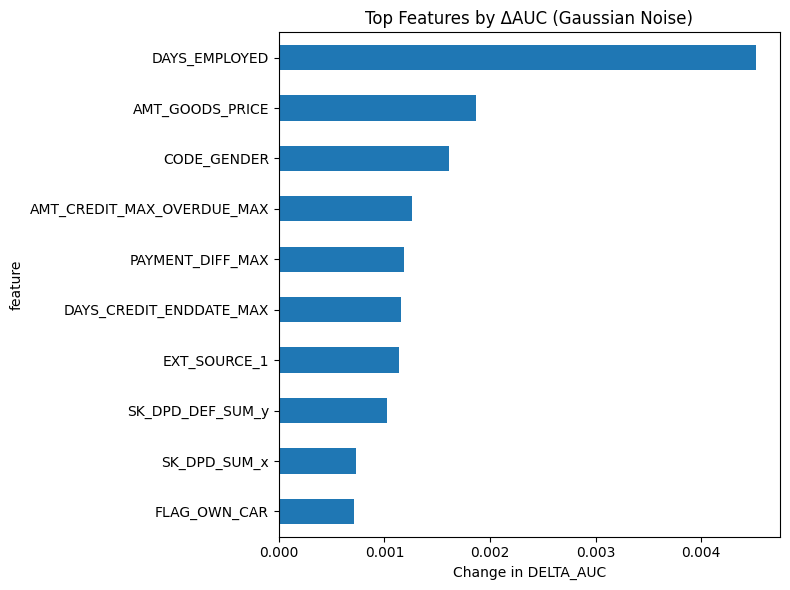

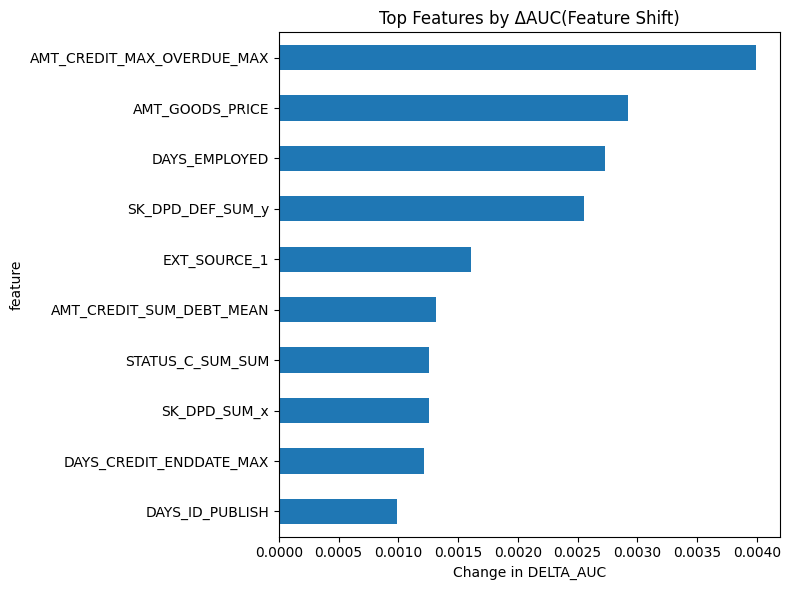

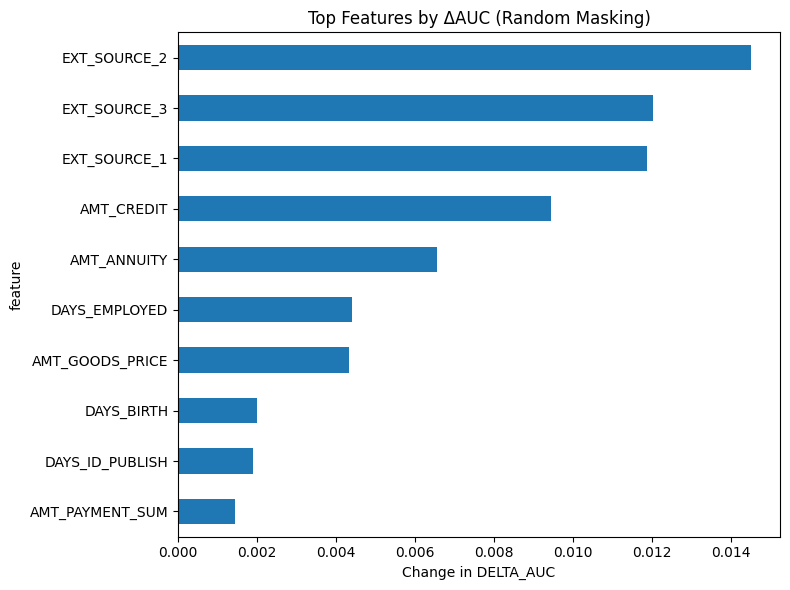

In [37]:
plot_top_features(df_noise_xgb, metric='delta_auc', title='Top Features by ΔAUC (Gaussian Noise)')
plot_top_features(df_shift_xgb, metric='delta_auc', title='Top Features by ΔAUC(Feature Shift)')
plot_top_features(df_mask_xgb, metric='delta_auc', title='Top Features by ΔAUC (Random Masking)')


## L0 Loss Sentitve Attack
Only L0 is applicable for tree-based model

In [38]:
X_loss_adv, loss_features = loss_sensitive_l0_attack(
    model=xgb_model,
    X_df=X_test,
    y=y_test.values if hasattr(y_test, 'values') else y_test,
    max_features=5,
    epsilon=0.1
)

evaluate_attack(X_loss_adv, y_test, xgb_model, label="Loss-Based L0 Attack (XGBoost)")


[Loss-Based L0 Attack (XGBoost)] Evaluation
AUC:       0.4176
Accuracy:  0.8787
F1 Score:  0.0281
              precision    recall  f1-score   support

     Class 0       0.92      0.95      0.94     56538
     Class 1       0.04      0.02      0.03      4965

    accuracy                           0.88     61503
   macro avg       0.48      0.49      0.48     61503
weighted avg       0.85      0.88      0.86     61503



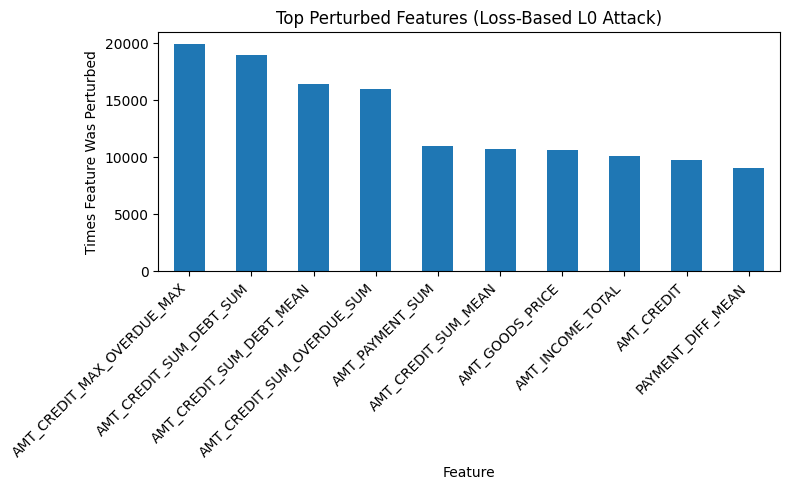

In [39]:
# Count how often each feature was perturbed across all samples
feature_flat = [f for sublist in loss_features for f in sublist]
feature_counts = Counter(feature_flat)

# Convert to DataFrame
df_feature_impact = pd.DataFrame.from_dict(feature_counts, orient='index', columns=['perturb_count'])
df_feature_impact.index.name = 'feature'
df_feature_impact.sort_values('perturb_count', ascending=False, inplace=True)


def plot_perturbed_features(df_feature_impact, top_n=10, title='Top Perturbed Features (Loss-Based L0 Attack)'):
    df_feature_impact.head(top_n).plot(kind='bar', legend=False, figsize=(8, 5))
    plt.title(title)
    plt.ylabel('Times Feature Was Perturbed')
    plt.xlabel('Feature')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

plot_perturbed_features(df_feature_impact)

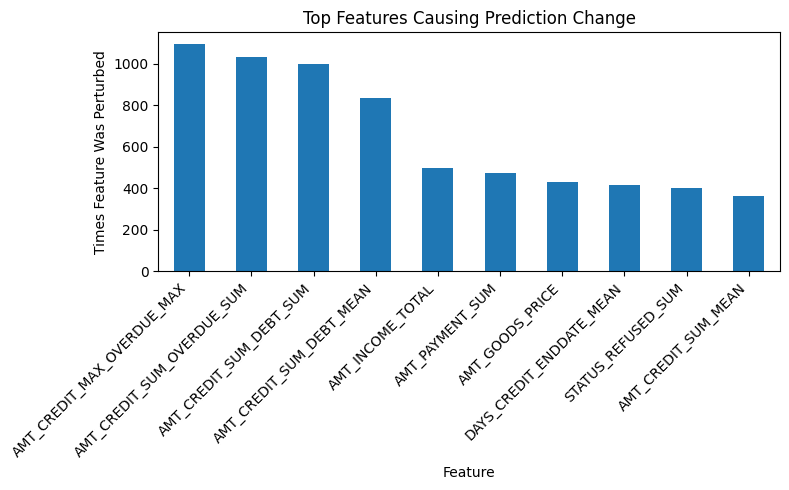

In [40]:
# Get original predictions
y_pred_orig = xgb_model.predict(X_test)
y_pred_adv = xgb_model.predict(X_loss_adv)

# Boolean mask of changed predictions
prediction_changed = (y_pred_orig != y_pred_adv)

# Count perturbations only on samples where prediction changed
changed_features = [
    f for changed, feats in zip(prediction_changed, loss_features) if changed for f in feats
]
changed_counts = Counter(changed_features)

df_changed_impact = pd.DataFrame.from_dict(changed_counts, orient='index', columns=['changed_count'])
df_changed_impact.index.name = 'feature'
df_changed_impact.sort_values('changed_count', ascending=False, inplace=True)

# Plot most responsible features
plot_perturbed_features(df_changed_impact, title='Top Features Causing Prediction Change')


# Solution Experiment

## Oversampling Using SMOTE

In [41]:
from imblearn.over_sampling import SMOTE

# === Create a copy of the training data for SMOTE ===
X_train_smote = X_train.copy()
y_train_smote = y_train.copy()

# Apply SMOTE on the *copied* and *scaled* training fold
smote = SMOTE(random_state=SEED, sampling_strategy=1.0)  
X_train_smote, y_train_smote = smote.fit_resample(X_train_smote, y_train_smote)


In [42]:
clf_smote = TabNetClassifier(**tabnet_params)
clf_smote.fit(
    X_train=X_train_smote.values,
    y_train=y_train_smote.values,
    eval_set=[(X_valid.values, y_valid.values)],
    eval_name=['valid'],
    eval_metric=['auc'],
    max_epochs=200,
    patience=20,
    batch_size=1024,
    virtual_batch_size=128,
    num_workers=0,
    drop_last=False
)


/Users/lucasdoan/Documents/MMA/.venv/lib/python3.12/site-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.62484 | valid_auc: 0.55144 |  0:00:37s
epoch 1  | loss: 0.55391 | valid_auc: 0.5983  |  0:01:12s
epoch 2  | loss: 0.53434 | valid_auc: 0.54711 |  0:01:47s
epoch 3  | loss: 0.5181  | valid_auc: 0.58086 |  0:02:23s
epoch 4  | loss: 0.49505 | valid_auc: 0.58629 |  0:02:57s
epoch 5  | loss: 0.47669 | valid_auc: 0.72331 |  0:03:29s
epoch 6  | loss: 0.47419 | valid_auc: 0.57772 |  0:04:02s
epoch 7  | loss: 0.49102 | valid_auc: 0.56457 |  0:04:36s
epoch 8  | loss: 0.5034  | valid_auc: 0.55342 |  0:05:11s
epoch 9  | loss: 0.51217 | valid_auc: 0.53411 |  0:05:46s
epoch 10 | loss: 0.50606 | valid_auc: 0.56314 |  0:06:20s
epoch 11 | loss: 0.48631 | valid_auc: 0.57779 |  0:06:54s
epoch 12 | loss: 0.46664 | valid_auc: 0.55703 |  0:07:28s
epoch 13 | loss: 0.47068 | valid_auc: 0.56456 |  0:08:03s
epoch 14 | loss: 0.4749  | valid_auc: 0.58419 |  0:08:37s
epoch 15 | loss: 0.4743  | valid_auc: 0.54512 |  0:09:12s
epoch 16 | loss: 0.45788 | valid_auc: 0.58976 |  0:09:46s
epoch 17 | los

/Users/lucasdoan/Documents/MMA/.venv/lib/python3.12/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


### TabNet Model Evaluation


[SMOTE Model] Test AUC: 0.7294
[SMOTE Model] Test Accuracy: 0.7448
[SMOTE Model] Test F1 Score: 0.2636

[SMOTE Model] Classification Report:
               precision    recall  f1-score   support

         0.0       0.95      0.76      0.85     56538
         1.0       0.17      0.57      0.26      4965

    accuracy                           0.74     61503
   macro avg       0.56      0.66      0.55     61503
weighted avg       0.89      0.74      0.80     61503



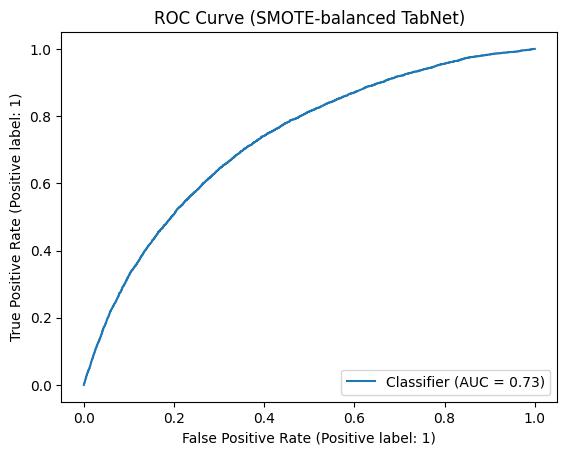

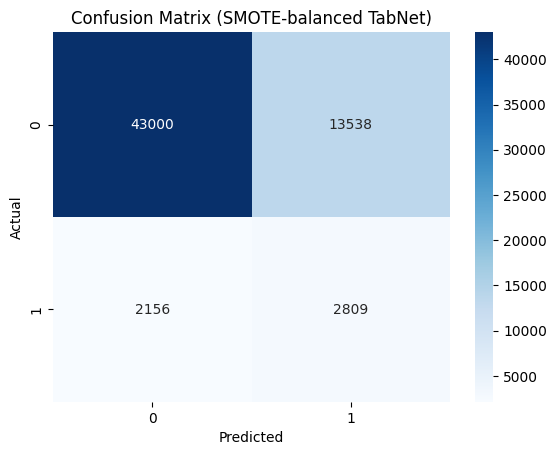

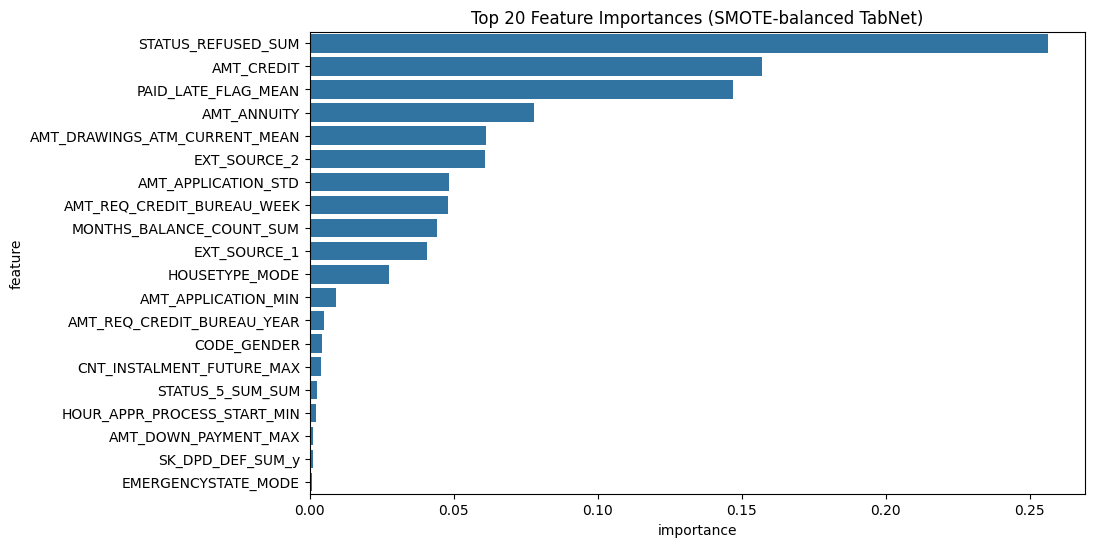

In [43]:
# === Setup for SMOTE model evaluation ===
feature_names = X.columns.tolist()
X_test_df = pd.DataFrame(X_test, columns=feature_names).reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# === Evaluate TabNet model trained with SMOTE ===
y_pred_proba_smote = clf_smote.predict_proba(X_test.values)[:, 1]
y_pred_smote = (y_pred_proba_smote >= 0.5).astype(int)

auc_smote = roc_auc_score(y_test, y_pred_proba_smote)
acc_smote = accuracy_score(y_test, y_pred_smote)
f1_smote = f1_score(y_test, y_pred_smote)

print(f"\n[SMOTE Model] Test AUC: {auc_smote:.4f}")
print(f"[SMOTE Model] Test Accuracy: {acc_smote:.4f}")
print(f"[SMOTE Model] Test F1 Score: {f1_smote:.4f}")
print("\n[SMOTE Model] Classification Report:\n", classification_report(y_test, y_pred_smote))

# === ROC Curve (SMOTE) ===
RocCurveDisplay.from_predictions(y_test, y_pred_proba_smote)
plt.title("ROC Curve (SMOTE-balanced TabNet)")
plt.show()

# === Confusion Matrix (SMOTE) ===
cm_smote = confusion_matrix(y_test, y_pred_smote)
sns.heatmap(cm_smote, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (SMOTE-balanced TabNet)")
plt.show()

# === Feature Importances (SMOTE) ===
importances_smote = clf_smote.feature_importances_
feat_names = X_train.columns  # Still valid — SMOTE used a copy
imp_df_smote = pd.DataFrame({'feature': feat_names, 'importance': importances_smote})
imp_df_smote = imp_df_smote.sort_values(by="importance", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x="importance", y="feature", data=imp_df_smote.head(20))
plt.title("Top 20 Feature Importances (SMOTE-balanced TabNet)")
plt.show()


#### Attacks Implementation

##### Covariate Perturbation

In [44]:
# === Perturbation Results (SMOTE-balanced TabNet) ===
X_cov_gauss_smote = evaluate_covariate_perturbation(
    X_test, y_test, clf_smote,
    methods=['gaussian_noise'],
    noise_level=0.05,
    verbose=True
)

X_cov_shift_smote = evaluate_covariate_perturbation(
    X_test, y_test, clf_smote,
    methods=['feature_shift'],
    noise_level=0.10,
    verbose=True
)

X_cov_mask_smote = evaluate_covariate_perturbation(
    X_test, y_test, clf_smote,
    methods=['random_mask'],
    mask_prob=0.15,
    verbose=True
)



Covariate Perturbation: ['gaussian_noise']
 - noise_level: 0.05, mask_prob: 0.1
 - threshold: 0.5
              precision    recall  f1-score   support

     Class 0       0.93      0.43      0.59     56538
     Class 1       0.09      0.61      0.15      4965

    accuracy                           0.44     61503
   macro avg       0.51      0.52      0.37     61503
weighted avg       0.86      0.44      0.55     61503

AUC-ROC: 0.5107
Prediction changes: 31241/61503 (50.80%)

Covariate Perturbation: ['feature_shift']
 - noise_level: 0.1, mask_prob: 0.1
 - threshold: 0.5
              precision    recall  f1-score   support

     Class 0       0.96      0.68      0.79     56538
     Class 1       0.15      0.64      0.24      4965

    accuracy                           0.67     61503
   macro avg       0.55      0.66      0.52     61503
weighted avg       0.89      0.67      0.75     61503

AUC-ROC: 0.7095
Prediction changes: 8330/61503 (13.54%)

Covariate Perturbation: ['random_mas

##### L0 Attacks

In [45]:
# === Adversarial Attacks on SMOTE-trained TabNet ===

assert isinstance(X_test, pd.DataFrame)
X_np = X_test.values
y_np = y_test.values if hasattr(y_test, 'values') else y_test
feature_names = list(X_test.columns)

# --- Gradient-Based L0 Attack (SMOTE) ---
X_grad_adv_smote, grad_features_smote = gradient_topk_l0_attack(
    model=clf_smote.network,
    X=X_np,
    y=y_np,
    epsilon=0.1,
    max_features=5,
    feature_names=feature_names
)
evaluate_attack(X_grad_adv_smote, y_np, clf_smote, label="Gradient-Based L0 Attack (SMOTE)")

# --- Loss-Sensitive L0 Attack (SMOTE) ---
X_loss_adv_smote, loss_features_smote = loss_sensitive_l0_attack(
    model=clf_smote,
    X_df=X_test,
    y=y_np,
    max_features=5,
    epsilon=0.1
)
evaluate_attack(X_loss_adv_smote, y_np, clf_smote, label="Loss-Based L0 Attack (SMOTE)")



[Gradient-Based L0 Attack (SMOTE)] Evaluation
AUC:       0.4742
Accuracy:  0.2822
F1 Score:  0.0962
              precision    recall  f1-score   support

     Class 0       0.85      0.27      0.40     56538
     Class 1       0.05      0.47      0.10      4965

    accuracy                           0.28     61503
   macro avg       0.45      0.37      0.25     61503
weighted avg       0.79      0.28      0.38     61503


[Loss-Based L0 Attack (SMOTE)] Evaluation
AUC:       0.3006
Accuracy:  0.4538
F1 Score:  0.0756
              precision    recall  f1-score   support

     Class 0       0.88      0.47      0.61     56538
     Class 1       0.04      0.28      0.08      4965

    accuracy                           0.45     61503
   macro avg       0.46      0.37      0.34     61503
weighted avg       0.81      0.45      0.57     61503



##### L2 Attacks

In [46]:
# === FGSM & PGD L2 Attacks on SMOTE-trained TabNet ===

assert isinstance(X_test, pd.DataFrame)
X_np = X_test.values
y_np = y_test.values if hasattr(y_test, 'values') else y_test

# --- FGSM-L2 Attack (SMOTE) ---
X_fgsm_adv_smote = fgsm_l2_attack(
    model=clf_smote.network,
    X=X_np,
    y=y_np,
    epsilon=3.0
)
evaluate_attack(X_fgsm_adv_smote, y_np, clf_smote, label="FGSM L2 Attack (SMOTE)")

# --- PGD-L2 Attack (SMOTE) ---
X_pgd_adv_smote = pgd_l2_attack(
    model=clf_smote.network,
    X=X_np,
    y=y_np,
    epsilon=3.0,
    alpha=0.5,
    iters=10
)
evaluate_attack(X_pgd_adv_smote, y_np, clf_smote, label="PGD L2 Attack (SMOTE)")



[FGSM L2 Attack (SMOTE)] Evaluation
AUC:       0.5987
Accuracy:  0.3049
F1 Score:  0.1431
              precision    recall  f1-score   support

     Class 0       0.92      0.27      0.42     56538
     Class 1       0.08      0.72      0.14      4965

    accuracy                           0.30     61503
   macro avg       0.50      0.49      0.28     61503
weighted avg       0.85      0.30      0.39     61503


[PGD L2 Attack (SMOTE)] Evaluation
AUC:       0.4406
Accuracy:  0.2977
F1 Score:  0.1131
              precision    recall  f1-score   support

     Class 0       0.88      0.28      0.42     56538
     Class 1       0.06      0.55      0.11      4965

    accuracy                           0.30     61503
   macro avg       0.47      0.41      0.27     61503
weighted avg       0.81      0.30      0.39     61503



##### L∞ Attacks

In [47]:
# === FGSM & PGD L∞ Attacks on SMOTE-trained TabNet ===

X_np = X_test.values
y_np = y_test.values if hasattr(y_test, 'values') else y_test

# --- FGSM L∞ Attack (SMOTE) ---
X_fgsm_linf_smote = fgsm_linf_attack(
    model=clf_smote.network,
    X=X_np,
    y=y_np,
    epsilon=0.1
)
evaluate_attack(X_fgsm_linf_smote, y_np, clf_smote, label="FGSM L∞ Attack (SMOTE)")

# --- PGD L∞ Attack (SMOTE) ---
X_pgd_linf_smote = pgd_linf_attack(
    model=clf_smote.network,
    X=X_np,
    y=y_np,
    epsilon=0.1,
    alpha=0.02,
    iters=10
)
evaluate_attack(X_pgd_linf_smote, y_np, clf_smote, label="PGD L∞ Attack (SMOTE)")



[FGSM L∞ Attack (SMOTE)] Evaluation
AUC:       0.4526
Accuracy:  0.2243
F1 Score:  0.0929
              precision    recall  f1-score   support

     Class 0       0.82      0.20      0.32     56538
     Class 1       0.05      0.49      0.09      4965

    accuracy                           0.22     61503
   macro avg       0.43      0.35      0.21     61503
weighted avg       0.76      0.22      0.30     61503


[PGD L∞ Attack (SMOTE)] Evaluation
AUC:       0.0114
Accuracy:  0.0986
F1 Score:  0.0035
              precision    recall  f1-score   support

     Class 0       0.55      0.11      0.18     56538
     Class 1       0.00      0.02      0.00      4965

    accuracy                           0.10     61503
   macro avg       0.28      0.06      0.09     61503
weighted avg       0.51      0.10      0.16     61503



#### Overall ROC-AUC

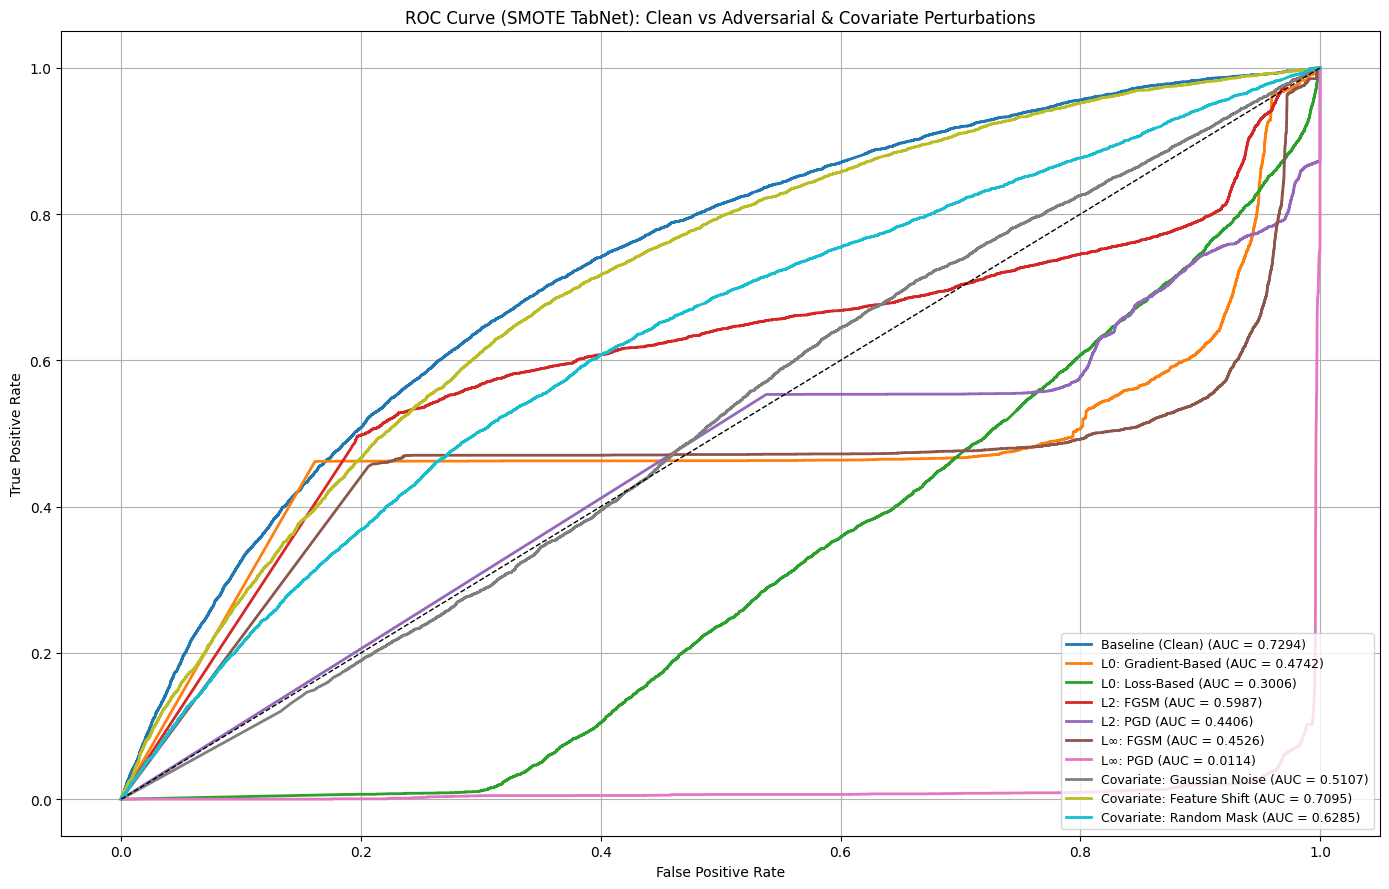

In [48]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Ensure correct format
y_true = y_test.values if hasattr(y_test, 'values') else y_test

# === Generate predictions from SMOTE model ===
try:
    y_base_smote = clf_smote.predict_proba(X_test.values)[:, 1]
    y_grad_l0_smote = clf_smote.predict_proba(X_grad_adv_smote)[:, 1]
    y_loss_l0_smote = clf_smote.predict_proba(X_loss_adv_smote)[:, 1]
    y_fgsm_l2_smote = clf_smote.predict_proba(X_fgsm_adv_smote)[:, 1]
    y_pgd_l2_smote = clf_smote.predict_proba(X_pgd_adv_smote)[:, 1]
    y_fgsm_linf_smote = clf_smote.predict_proba(X_fgsm_linf_smote)[:, 1]
    y_pgd_linf_smote = clf_smote.predict_proba(X_pgd_linf_smote)[:, 1]
    y_cov_gauss_smote = clf_smote.predict_proba(X_cov_gauss_smote)[:, 1]
    y_cov_shift_smote = clf_smote.predict_proba(X_cov_shift_smote)[:, 1]
    y_cov_mask_smote = clf_smote.predict_proba(X_cov_mask_smote)[:, 1]
except Exception as e:
    raise RuntimeError(f"Error during predict_proba with SMOTE model: {e}")

# === Store all predictions ===
roc_results_smote = {
    "Baseline (Clean)": y_base_smote,
    "L0: Gradient-Based": y_grad_l0_smote,
    "L0: Loss-Based": y_loss_l0_smote,
    "L2: FGSM": y_fgsm_l2_smote,
    "L2: PGD": y_pgd_l2_smote,
    "L∞: FGSM": y_fgsm_linf_smote,
    "L∞: PGD": y_pgd_linf_smote,
    "Covariate: Gaussian Noise": y_cov_gauss_smote,
    "Covariate: Feature Shift": y_cov_shift_smote,
    "Covariate: Random Mask": y_cov_mask_smote
}

# === Plot ROC Curves for SMOTE Model ===
plt.figure(figsize=(14, 9))

for label, y_scores in roc_results_smote.items():
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    auc = roc_auc_score(y_true, y_scores)
    plt.plot(fpr, tpr, lw=2, label=f"{label} (AUC = {auc:.4f})")

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (SMOTE TabNet): Clean vs Adversarial & Covariate Perturbations")
plt.legend(loc="lower right", fontsize=9)
plt.grid(True)
plt.tight_layout()
plt.show()


### Extreme Gradient Boosting Evaluation

=== XGBoost (SMOTE) Classification Report ===
              precision    recall  f1-score   support

     Class 0       0.92      0.99      0.96     56538
     Class 1       0.49      0.06      0.11      4965

    accuracy                           0.92     61503
   macro avg       0.71      0.53      0.53     61503
weighted avg       0.89      0.92      0.89     61503

XGBoost (SMOTE) AUC-ROC Score: 0.7656


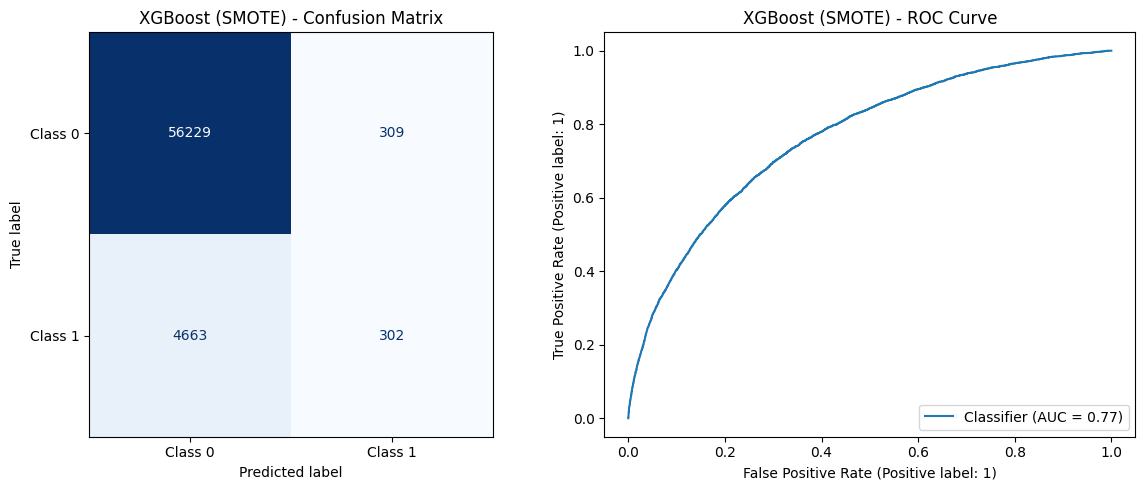

In [49]:
# === XGBoost Model Trained on SMOTE-Balanced Data ===
xgb_smote = XGBClassifier(
    n_estimators=9999,            
    learning_rate=0.03,         
    max_depth=6,                
    subsample=0.8,
    colsample_bytree=0.8,
    objective='binary:logistic',
    eval_metric='auc',
    reg_alpha=1,                 # L1
    reg_lambda=1,                # L2
    random_state=SEED,
    n_jobs=-1,
    tree_method='hist',          
)


# Train on SMOTE-balanced training data
xgb_smote.fit(X_train_smote, y_train_smote)

# Predict on test set
y_pred_test_smote = xgb_smote.predict(X_test)
y_pred_proba_test_smote = xgb_smote.predict_proba(X_test)[:, 1]

# Evaluation
print("=== XGBoost (SMOTE) Classification Report ===")
print(classification_report(
    y_test, y_pred_test_smote,
    target_names=["Class 0", "Class 1"]
))

auc_score_smote = roc_auc_score(y_test, y_pred_proba_test_smote)
print(f"XGBoost (SMOTE) AUC-ROC Score: {auc_score_smote:.4f}")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_test_smote,
    display_labels=["Class 0", "Class 1"],
    cmap='Blues',
    colorbar=False,
    ax=axes[0]
)
axes[0].set_title("XGBoost (SMOTE) - Confusion Matrix")

# ROC Curve
RocCurveDisplay.from_predictions(
    y_test, y_pred_proba_test_smote,
    ax=axes[1]
)
axes[1].set_title("XGBoost (SMOTE) - ROC Curve")

plt.tight_layout()
plt.show()


#### Covariate Perturbation

In [50]:
# --- Run Perturbations with Metrics (XGBoost SMOTE) ---
m1_smote, X_cov_gauss_smote = evaluate_covariate_perturbation(
    X_test, y_test, xgb_smote,
    methods=['gaussian_noise'],
    noise_level=0.05,
    verbose=True,
    return_metrics=True
)

m2_smote, X_cov_shift_smote = evaluate_covariate_perturbation(
    X_test, y_test, xgb_smote,
    methods=['feature_shift'],
    noise_level=0.10,
    verbose=True,
    return_metrics=True
)

m3_smote, X_cov_mask_smote = evaluate_covariate_perturbation(
    X_test, y_test, xgb_smote,
    methods=['random_mask'],
    mask_prob=0.15,
    verbose=True,
    return_metrics=True
)

# --- Organize SMOTE Results ---
results_smote = {
    "Gaussian Noise": m1_smote,
    "Feature Shift": m2_smote,
    "Random Mask": m3_smote
}

df_results_smote = pd.DataFrame(results_smote).T



Covariate Perturbation: ['gaussian_noise']
 - noise_level: 0.05, mask_prob: 0.1
 - threshold: 0.5
              precision    recall  f1-score   support

     Class 0       0.00      0.00      0.00     56538
     Class 1       0.08      1.00      0.15      4965

    accuracy                           0.08     61503
   macro avg       0.04      0.50      0.07     61503
weighted avg       0.01      0.08      0.01     61503

AUC-ROC: 0.5647


/Users/lucasdoan/Documents/MMA/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lucasdoan/Documents/MMA/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lucasdoan/Documents/MMA/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

Prediction changes: 60892/61503 (99.01%)

Covariate Perturbation: ['feature_shift']
 - noise_level: 0.1, mask_prob: 0.1
 - threshold: 0.5
              precision    recall  f1-score   support

     Class 0       0.99      0.01      0.02     56538
     Class 1       0.08      1.00      0.15      4965

    accuracy                           0.09     61503
   macro avg       0.53      0.50      0.08     61503
weighted avg       0.91      0.09      0.03     61503

AUC-ROC: 0.6239
Prediction changes: 60331/61503 (98.09%)

Covariate Perturbation: ['random_mask']
 - noise_level: 0.05, mask_prob: 0.15
 - threshold: 0.5
              precision    recall  f1-score   support

     Class 0       0.92      0.97      0.95     56538
     Class 1       0.26      0.10      0.14      4965

    accuracy                           0.90     61503
   macro avg       0.59      0.54      0.55     61503
weighted avg       0.87      0.90      0.88     61503

AUC-ROC: 0.6986
Prediction changes: 1889/61503 (3.07%)

#### L0 Attack

In [51]:
# === Loss-Based L0 Attack on XGBoost (SMOTE) ===
X_loss_adv_xgb_smote, loss_features_xgb_smote = loss_sensitive_l0_attack(
    model=xgb_smote,
    X_df=X_test,
    y=y_test.values if hasattr(y_test, 'values') else y_test,
    max_features=5,
    epsilon=0.1
)

evaluate_attack(X_loss_adv_xgb_smote, y_test, xgb_smote, label="Loss-Based L0 Attack (XGBoost SMOTE)")



[Loss-Based L0 Attack (XGBoost SMOTE)] Evaluation
AUC:       0.1117
Accuracy:  0.4826
F1 Score:  0.0070
              precision    recall  f1-score   support

     Class 0       0.86      0.52      0.65     56538
     Class 1       0.00      0.02      0.01      4965

    accuracy                           0.48     61503
   macro avg       0.43      0.27      0.33     61503
weighted avg       0.79      0.48      0.60     61503



## TabNet WITH Noise Injection + Random OverSampling 

In [52]:
# --------- IMPROVED ROBUST TABNET TRAINING PIPELINE ---------
from pytorch_tabnet.tab_model import TabNetClassifier
from imblearn.over_sampling import RandomOverSampler
import numpy as np
import torch

# === STEP 1: Inject Gaussian Noise ===
np.random.seed(42)
X_train_noisy = X_train.copy().astype(np.float32)
noise = np.random.normal(loc=0.0, scale=0.01, size=X_train.shape)
X_train_noisy += noise

# === STEP 2: Resample (RandomOverSampler) ===
ros = RandomOverSampler(sampling_strategy="auto", random_state=42)
X_train_aug, y_train_aug = ros.fit_resample(X_train_noisy, y_train)
print("Training shape after noise + resampling:", X_train_aug.shape)

# === STEP 3: Define Robust TabNet Hyperparameters ===
tabnet_params = {
    'n_d': 24,
    'n_a': 24,
    'n_steps': 5,
    'gamma': 1.5,
    'lambda_sparse': 1e-4,
    'optimizer_fn': torch.optim.Adam,
    'optimizer_params': dict(lr=2e-2),
    'mask_type': 'entmax',  # More stable than sparsemax
    'scheduler_params': {"step_size": 10, "gamma": 0.9},
    'scheduler_fn': torch.optim.lr_scheduler.StepLR,
    'verbose': 1,
    'seed': 42
}

# === STEP 4: Initialize and Train ===
clf_robust = TabNetClassifier(**tabnet_params)

clf_robust.fit(
    X_train_aug.values, y_train_aug.values,
    eval_set=[(X_valid.values, y_valid.values)],
    eval_name=['valid'],
    eval_metric=['auc'],
    max_epochs=200,
    patience=20,
    batch_size=1024,
    virtual_batch_size=128,
    num_workers=0,
    drop_last=False
)


Training shape after noise + resampling: (361836, 166)


/Users/lucasdoan/Documents/MMA/.venv/lib/python3.12/site-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.66763 | valid_auc: 0.72993 |  0:00:31s
epoch 1  | loss: 0.60927 | valid_auc: 0.7344  |  0:01:01s
epoch 2  | loss: 0.60255 | valid_auc: 0.74659 |  0:01:32s
epoch 3  | loss: 0.59583 | valid_auc: 0.74694 |  0:02:03s
epoch 4  | loss: 0.58933 | valid_auc: 0.75575 |  0:02:34s
epoch 5  | loss: 0.58404 | valid_auc: 0.75801 |  0:03:05s
epoch 6  | loss: 0.58075 | valid_auc: 0.76013 |  0:03:35s
epoch 7  | loss: 0.57865 | valid_auc: 0.76274 |  0:04:06s
epoch 8  | loss: 0.56991 | valid_auc: 0.7629  |  0:04:37s
epoch 9  | loss: 0.5679  | valid_auc: 0.76081 |  0:05:08s
epoch 10 | loss: 0.56179 | valid_auc: 0.75579 |  0:05:38s
epoch 11 | loss: 0.55806 | valid_auc: 0.75976 |  0:06:09s
epoch 12 | loss: 0.54704 | valid_auc: 0.754   |  0:06:39s
epoch 13 | loss: 0.53428 | valid_auc: 0.7568  |  0:07:10s
epoch 14 | loss: 0.51171 | valid_auc: 0.74977 |  0:07:40s
epoch 15 | loss: 0.48656 | valid_auc: 0.74766 |  0:08:10s
epoch 16 | loss: 0.46167 | valid_auc: 0.73819 |  0:08:41s
epoch 17 | los

/Users/lucasdoan/Documents/MMA/.venv/lib/python3.12/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)




====== Original TabNet Evaluation ======

Test AUC: 0.7729
Test Accuracy: 0.9200
Test F1 Score: 0.0390

Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     56538
         1.0       0.64      0.02      0.04      4965

    accuracy                           0.92     61503
   macro avg       0.78      0.51      0.50     61503
weighted avg       0.90      0.92      0.88     61503



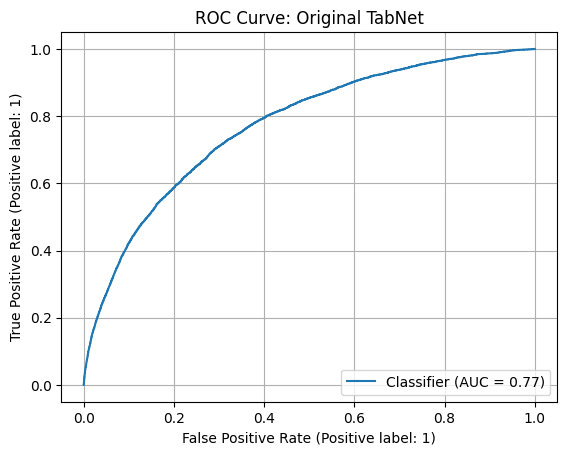

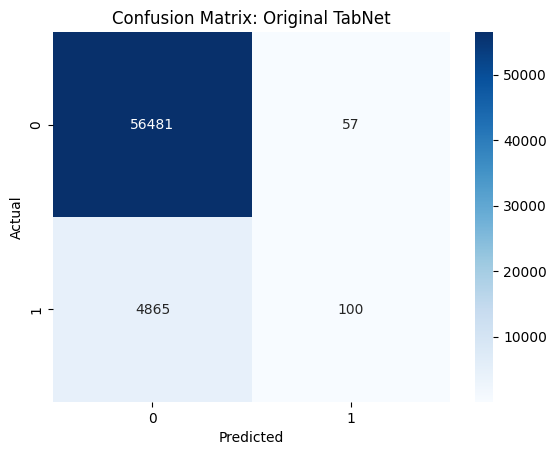

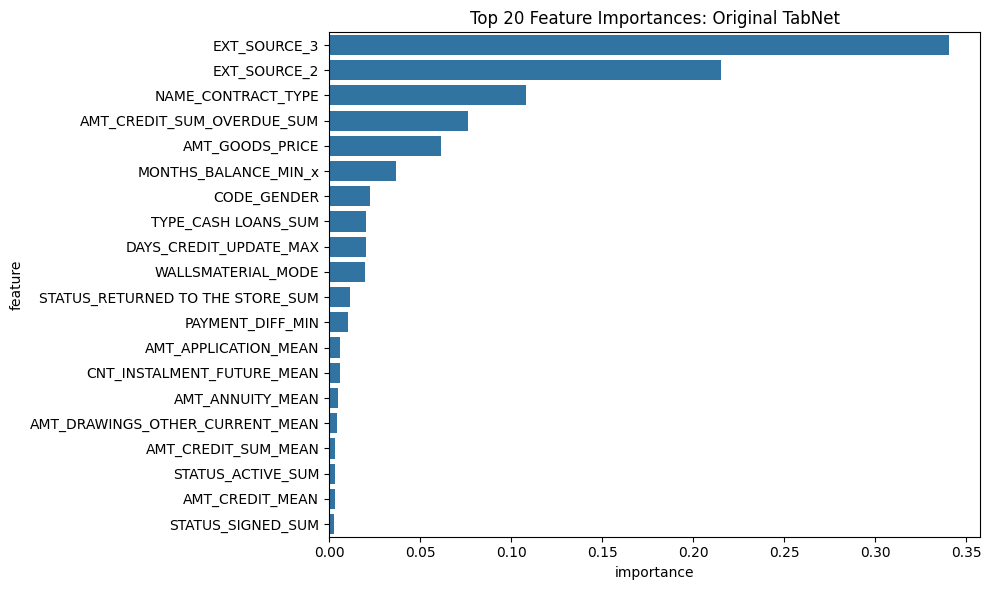



====== Robust TabNet Evaluation ======

Test AUC: 0.7666
Test Accuracy: 0.7169
Test F1 Score: 0.2789

Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.72      0.82     56538
         1.0       0.18      0.68      0.28      4965

    accuracy                           0.72     61503
   macro avg       0.57      0.70      0.55     61503
weighted avg       0.90      0.72      0.78     61503



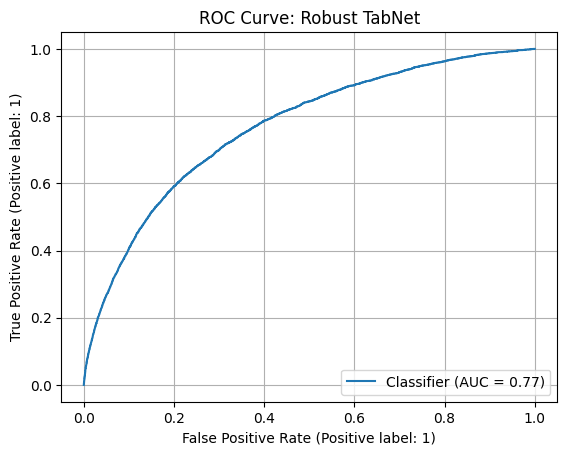

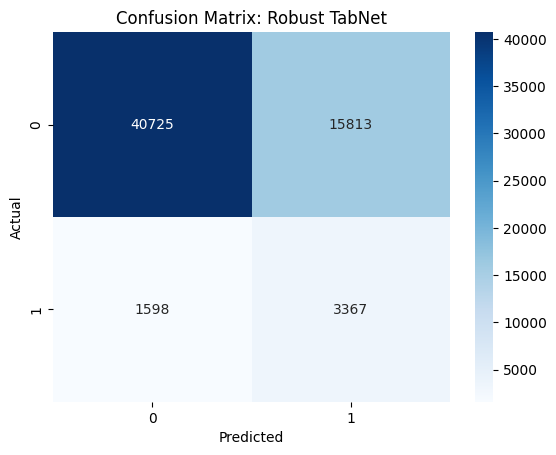

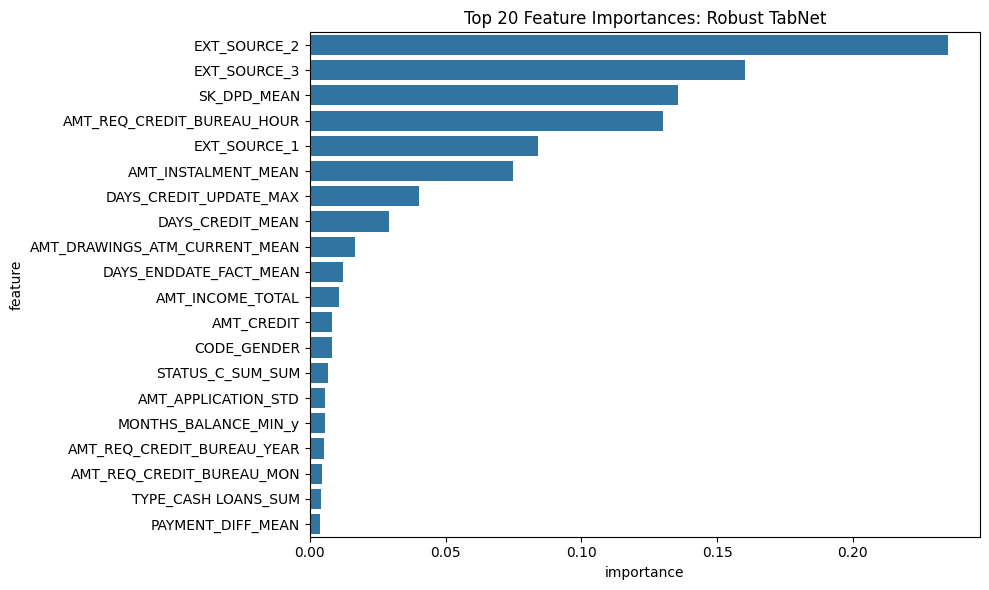

In [53]:
models = {
    "Original TabNet": clf,
    "Robust TabNet": clf_robust
}

for model_name, model in models.items():
    print(f"\n\n====== {model_name} Evaluation ======")

    # === Predict ===
    y_pred_proba = model.predict_proba(X_test.values)[:, 1]
    y_pred = (y_pred_proba >= 0.5).astype(int)

    # === Metrics ===
    auc = roc_auc_score(y_test, y_pred_proba)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"\nTest AUC: {auc:.4f}")
    print(f"Test Accuracy: {acc:.4f}")
    print(f"Test F1 Score: {f1:.4f}")
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    # === ROC Curve ===
    RocCurveDisplay.from_predictions(y_test, y_pred_proba)
    plt.title(f"ROC Curve: {model_name}")
    plt.grid(True)
    plt.show()

    # === Confusion Matrix ===
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix: {model_name}")
    plt.show()

    # === Feature Importances ===
    try:
        importances = model.feature_importances_
        feat_names = X_train.columns
        imp_df = pd.DataFrame({'feature': feat_names, 'importance': importances})
        imp_df = imp_df.sort_values(by='importance', ascending=False)

        plt.figure(figsize=(10, 6))
        sns.barplot(x='importance', y='feature', data=imp_df.head(20))
        plt.title(f"Top 20 Feature Importances: {model_name}")
        plt.tight_layout()
        plt.show()
    except AttributeError:
        print(f"{model_name} does not support feature_importances_.")


### Attacks Implementation

#### Covariate Perturbation

In [54]:
# === Covariate Perturbation Evaluation (Robust TabNet) ===
X_cov_gauss_robust = evaluate_covariate_perturbation(
    X_test, y_test, clf_robust,
    methods=['gaussian_noise'],
    noise_level=0.05,
    verbose=True
)

X_cov_shift_robust = evaluate_covariate_perturbation(
    X_test, y_test, clf_robust,
    methods=['feature_shift'],
    noise_level=0.10,
    verbose=True
)

X_cov_mask_robust = evaluate_covariate_perturbation(
    X_test, y_test, clf_robust,
    methods=['random_mask'],
    mask_prob=0.15,
    verbose=True
)



Covariate Perturbation: ['gaussian_noise']
 - noise_level: 0.05, mask_prob: 0.1
 - threshold: 0.5
              precision    recall  f1-score   support

     Class 0       0.95      0.67      0.78     56538
     Class 1       0.14      0.64      0.23      4965

    accuracy                           0.66     61503
   macro avg       0.55      0.65      0.51     61503
weighted avg       0.89      0.66      0.74     61503

AUC-ROC: 0.7056
Prediction changes: 12729/61503 (20.70%)

Covariate Perturbation: ['feature_shift']
 - noise_level: 0.1, mask_prob: 0.1
 - threshold: 0.5
              precision    recall  f1-score   support

     Class 0       0.96      0.81      0.88     56538
     Class 1       0.21      0.57      0.30      4965

    accuracy                           0.79     61503
   macro avg       0.58      0.69      0.59     61503
weighted avg       0.89      0.79      0.83     61503

AUC-ROC: 0.7615
Prediction changes: 6701/61503 (10.90%)

Covariate Perturbation: ['random_mas

#### L0 Attacks

In [55]:
# === Gradient-Based & Loss-Sensitive L0 Attacks (Robust TabNet) ===
X_np = X_test.values
y_np = y_test.values if hasattr(y_test, 'values') else y_test
feature_names = list(X_test.columns)

# Gradient-Based L0
X_grad_adv_robust, grad_features_robust = gradient_topk_l0_attack(
    model=clf_robust.network,
    X=X_np,
    y=y_np,
    epsilon=0.1,
    max_features=5,
    feature_names=feature_names
)
evaluate_attack(X_grad_adv_robust, y_np, clf_robust, label="Gradient-Based L0 Attack (Robust)")

# Loss-Sensitive L0
X_loss_adv_robust, loss_features_robust = loss_sensitive_l0_attack(
    model=clf_robust,
    X_df=X_test,
    y=y_np,
    max_features=5,
    epsilon=0.1
)
evaluate_attack(X_loss_adv_robust, y_np, clf_robust, label="Loss-Based L0 Attack (Robust)")



[Gradient-Based L0 Attack (Robust)] Evaluation
AUC:       0.1906
Accuracy:  0.3074
F1 Score:  0.0461
              precision    recall  f1-score   support

     Class 0       0.82      0.32      0.46     56538
     Class 1       0.03      0.21      0.05      4965

    accuracy                           0.31     61503
   macro avg       0.42      0.26      0.25     61503
weighted avg       0.76      0.31      0.42     61503


[Loss-Based L0 Attack (Robust)] Evaluation
AUC:       0.6729
Accuracy:  0.6484
F1 Score:  0.2177
              precision    recall  f1-score   support

     Class 0       0.95      0.65      0.77     56538
     Class 1       0.13      0.61      0.22      4965

    accuracy                           0.65     61503
   macro avg       0.54      0.63      0.50     61503
weighted avg       0.88      0.65      0.73     61503



#### L2 Attacks

In [56]:
# === FGSM & PGD L2 Attacks (Robust TabNet) ===
X_np = X_test.values
y_np = y_test.values if hasattr(y_test, 'values') else y_test

# FGSM L2
X_fgsm_l2_robust = fgsm_l2_attack(
    model=clf_robust.network,
    X=X_np,
    y=y_np,
    epsilon=3.0
)
evaluate_attack(X_fgsm_l2_robust, y_np, clf_robust, label="FGSM L2 Attack (Robust)")

# PGD L2
X_pgd_l2_robust = pgd_l2_attack(
    model=clf_robust.network,
    X=X_np,
    y=y_np,
    epsilon=3.0,
    alpha=0.5,
    iters=10
)
evaluate_attack(X_pgd_l2_robust, y_np, clf_robust, label="PGD L2 Attack (Robust)")



[FGSM L2 Attack (Robust)] Evaluation
AUC:       0.1018
Accuracy:  0.1970
F1 Score:  0.0038
              precision    recall  f1-score   support

     Class 0       0.71      0.21      0.33     56538
     Class 1       0.00      0.02      0.00      4965

    accuracy                           0.20     61503
   macro avg       0.36      0.12      0.17     61503
weighted avg       0.65      0.20      0.30     61503


[PGD L2 Attack (Robust)] Evaluation
AUC:       0.0142
Accuracy:  0.0217
F1 Score:  0.0001
              precision    recall  f1-score   support

     Class 0       0.21      0.02      0.04     56538
     Class 1       0.00      0.00      0.00      4965

    accuracy                           0.02     61503
   macro avg       0.11      0.01      0.02     61503
weighted avg       0.19      0.02      0.04     61503



#### L∞ Attacks

In [57]:
# === FGSM & PGD L∞ Attacks (Robust TabNet) ===
X_np = X_test.values
y_np = y_test.values if hasattr(y_test, 'values') else y_test

# FGSM L∞
X_fgsm_linf_robust = fgsm_linf_attack(
    model=clf_robust.network,
    X=X_np,
    y=y_np,
    epsilon=0.1
)
evaluate_attack(X_fgsm_linf_robust, y_np, clf_robust, label="FGSM L∞ Attack (Robust)")

# PGD L∞
X_pgd_linf_robust = pgd_linf_attack(
    model=clf_robust.network,
    X=X_np,
    y=y_np,
    epsilon=0.1,
    alpha=0.02,
    iters=10
)
evaluate_attack(X_pgd_linf_robust, y_np, clf_robust, label="PGD L∞ Attack (Robust)")



[FGSM L∞ Attack (Robust)] Evaluation
AUC:       0.0764
Accuracy:  0.1586
F1 Score:  0.0104
              precision    recall  f1-score   support

     Class 0       0.67      0.17      0.27     56538
     Class 1       0.01      0.05      0.01      4965

    accuracy                           0.16     61503
   macro avg       0.34      0.11      0.14     61503
weighted avg       0.62      0.16      0.25     61503


[PGD L∞ Attack (Robust)] Evaluation
AUC:       0.0433
Accuracy:  0.0882
F1 Score:  0.0076
              precision    recall  f1-score   support

     Class 0       0.52      0.09      0.16     56538
     Class 1       0.00      0.04      0.01      4965

    accuracy                           0.09     61503
   macro avg       0.26      0.07      0.08     61503
weighted avg       0.48      0.09      0.14     61503



### Overall ROC-AUC

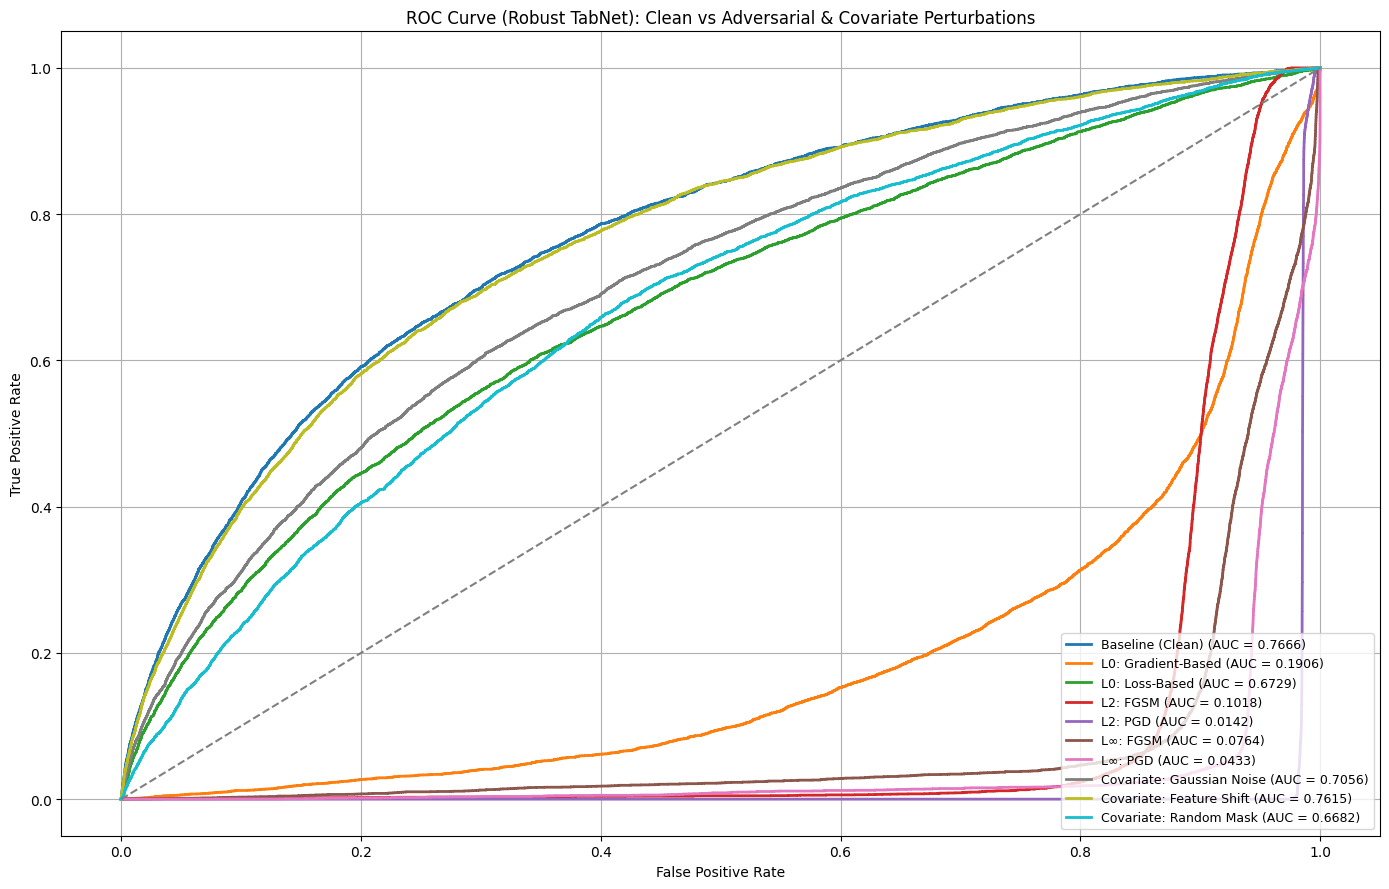

In [58]:
y_true = y_test.values if hasattr(y_test, 'values') else y_test

# Predict probabilities
try:
    y_base_robust = clf_robust.predict_proba(X_test.values)[:, 1]
    y_grad_l0_robust = clf_robust.predict_proba(X_grad_adv_robust)[:, 1]
    y_loss_l0_robust = clf_robust.predict_proba(X_loss_adv_robust)[:, 1]
    y_fgsm_l2_robust = clf_robust.predict_proba(X_fgsm_l2_robust)[:, 1]
    y_pgd_l2_robust = clf_robust.predict_proba(X_pgd_l2_robust)[:, 1]
    y_fgsm_linf_robust = clf_robust.predict_proba(X_fgsm_linf_robust)[:, 1]
    y_pgd_linf_robust = clf_robust.predict_proba(X_pgd_linf_robust)[:, 1]
    y_cov_gauss_robust = clf_robust.predict_proba(X_cov_gauss_robust)[:, 1]
    y_cov_shift_robust = clf_robust.predict_proba(X_cov_shift_robust)[:, 1]
    y_cov_mask_robust = clf_robust.predict_proba(X_cov_mask_robust)[:, 1]
except Exception as e:
    raise RuntimeError(f"Error during predict_proba with Robust model: {e}")

# Store results
roc_results_robust = {
    "Baseline (Clean)": y_base_robust,
    "L0: Gradient-Based": y_grad_l0_robust,
    "L0: Loss-Based": y_loss_l0_robust,
    "L2: FGSM": y_fgsm_l2_robust,
    "L2: PGD": y_pgd_l2_robust,
    "L∞: FGSM": y_fgsm_linf_robust,
    "L∞: PGD": y_pgd_linf_robust,
    "Covariate: Gaussian Noise": y_cov_gauss_robust,
    "Covariate: Feature Shift": y_cov_shift_robust,
    "Covariate: Random Mask": y_cov_mask_robust
}

# Plot ROC curves
plt.figure(figsize=(14, 9))
for label, y_scores in roc_results_robust.items():
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    auc = roc_auc_score(y_true, y_scores)
    plt.plot(fpr, tpr, lw=2, label=f'{label} (AUC = {auc:.4f})')

plt.plot([0, 1], [0, 1], '--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Robust TabNet): Clean vs Adversarial & Covariate Perturbations")
plt.legend(loc='lower right', fontsize=9)
plt.grid(True)
plt.tight_layout()
plt.show()


##  Extreme Gradient Boosting WITH Gaussian Noise Injection 

/Users/lucasdoan/Documents/MMA/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [23:35:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


=== Classification Report (Robust XGBoost) ===
              precision    recall  f1-score   support

     Class 0       0.92      1.00      0.96     56538
     Class 1       0.51      0.06      0.10      4965

    accuracy                           0.92     61503
   macro avg       0.72      0.53      0.53     61503
weighted avg       0.89      0.92      0.89     61503

AUC-ROC Score: 0.7687


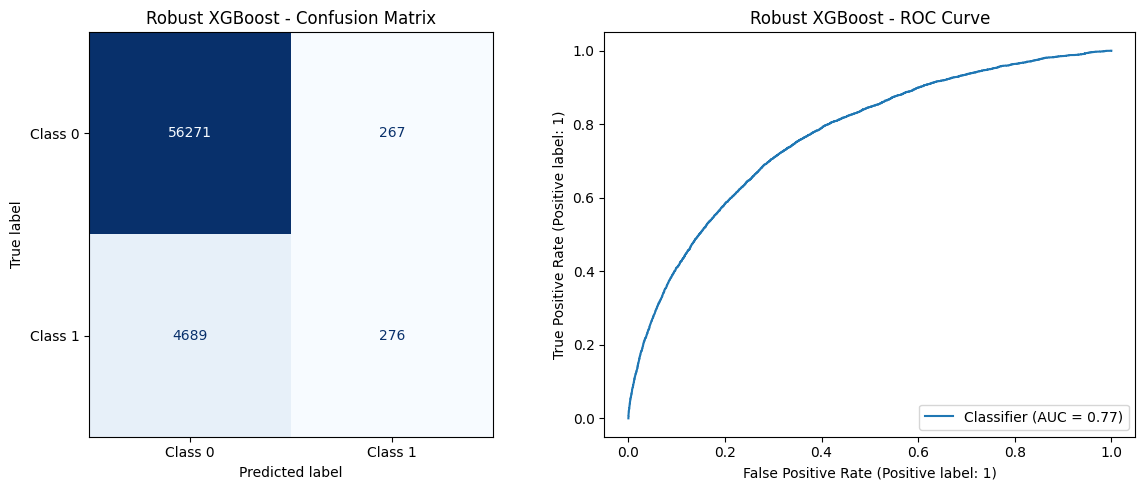

In [59]:
# Inject noise into training data for robustness
def add_noise(X, noise_level=0.03):
    return X + np.random.normal(0, noise_level, X.shape)

# Fit a more robust XGBoost model
xgb_robust = XGBClassifier(
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.7,
    colsample_bytree=0.7,
    reg_alpha=5,
    reg_lambda=5,
    use_label_encoder=False,
    eval_metric='auc',
    random_state=42
)

X_train_noisy = add_noise(X_train, noise_level=0.03)
xgb_robust.fit(X_train_noisy, y_train)
y_pred_robust = xgb_robust.predict(X_test)
y_proba_robust = xgb_robust.predict_proba(X_test)[:, 1]

print("=== Classification Report (Robust XGBoost) ===")
print(classification_report(y_test, y_pred_robust, target_names=["Class 0", "Class 1"]))
print(f"AUC-ROC Score: {roc_auc_score(y_test, y_proba_robust):.4f}")

# Plot Confusion Matrix and ROC
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_robust, display_labels=["Class 0", "Class 1"],
                                        cmap='Blues', colorbar=False, ax=axes[0])
axes[0].set_title("Robust XGBoost - Confusion Matrix")

RocCurveDisplay.from_predictions(y_test, y_proba_robust, ax=axes[1])
axes[1].set_title("Robust XGBoost - ROC Curve")
plt.tight_layout()
plt.show()


### Attacks Implementation

#### Covariate Perturbation

In [60]:
# === Run Perturbations with Metrics (XGBoost Gaussian Noise) ===
m1_noise, X_cov_gauss_noise = evaluate_covariate_perturbation(
    X_test, y_test, xgb_robust,
    methods=['gaussian_noise'],
    noise_level=0.05,
    verbose=True,
    return_metrics=True
)

m2_noise, X_cov_shift_noise = evaluate_covariate_perturbation(
    X_test, y_test, xgb_robust,
    methods=['feature_shift'],
    noise_level=0.10,
    verbose=True,
    return_metrics=True
)

m3_noise, X_cov_mask_noise = evaluate_covariate_perturbation(
    X_test, y_test, xgb_robust,
    methods=['random_mask'],
    mask_prob=0.15,
    verbose=True,
    return_metrics=True
)

# === Organize Results ===
results_noise = {
    "Gaussian Noise": m1_noise,
    "Feature Shift": m2_noise,
    "Random Mask": m3_noise
}

df_results_noise = pd.DataFrame(results_noise).T



Covariate Perturbation: ['gaussian_noise']
 - noise_level: 0.05, mask_prob: 0.1
 - threshold: 0.5
              precision    recall  f1-score   support

     Class 0       0.92      1.00      0.96     56538
     Class 1       0.49      0.02      0.03      4965

    accuracy                           0.92     61503
   macro avg       0.71      0.51      0.49     61503
weighted avg       0.89      0.92      0.88     61503

AUC-ROC: 0.7371
Prediction changes: 506/61503 (0.82%)

Covariate Perturbation: ['feature_shift']
 - noise_level: 0.1, mask_prob: 0.1
 - threshold: 0.5
              precision    recall  f1-score   support

     Class 0       0.92      0.99      0.96     56538
     Class 1       0.47      0.06      0.11      4965

    accuracy                           0.92     61503
   macro avg       0.70      0.53      0.53     61503
weighted avg       0.89      0.92      0.89     61503

AUC-ROC: 0.7635
Prediction changes: 407/61503 (0.66%)

Covariate Perturbation: ['random_mask']
 

#### L0 Attack

In [61]:
# === Loss-Based L₀ Attack on XGBoost (Gaussian Noise) ===
X_loss_adv_xgb_noise, loss_features_xgb_noise = loss_sensitive_l0_attack(
    model=xgb_robust,
    X_df=X_test,
    y=y_test.values if hasattr(y_test, 'values') else y_test,
    max_features=5,
    epsilon=0.1
)

evaluate_attack(X_loss_adv_xgb_noise, y_test, xgb_robust, label="Loss-Based L₀ Attack (XGBoost Noise)")



[Loss-Based L₀ Attack (XGBoost Noise)] Evaluation
AUC:       0.6386
Accuracy:  0.9115
F1 Score:  0.0535
              precision    recall  f1-score   support

     Class 0       0.92      0.99      0.95     56538
     Class 1       0.20      0.03      0.05      4965

    accuracy                           0.91     61503
   macro avg       0.56      0.51      0.50     61503
weighted avg       0.86      0.91      0.88     61503



In [ ]:
# --------- ADVERSARIALLY TRAINED TABNET (GAUSSIAN + SMOTE + FGSM L∞) ---------
from pytorch_tabnet.tab_model import TabNetClassifier
from imblearn.over_sampling import SMOTE
import numpy as np
import torch

# === STEP 1: Gaussian Noise Injection ===
np.random.seed(42)
X_train_noisy = X_train.copy().astype(np.float32)
noise = np.random.normal(loc=0.0, scale=0.01, size=X_train.shape)
X_train_noisy += noise

# === STEP 2: SMOTE (1:1 Balanced) ===
smote = SMOTE(sampling_strategy=1.0, random_state=42)
X_train_smote_robust, y_train_smote_robust = smote.fit_resample(X_train_noisy, y_train)

# === STEP 3: Generate FGSM L∞ Adversarial Examples ===
X_fgsm_train_robust = fgsm_linf_attack(
    model=clf_smote.network,  #  this was trained already
    X=X_train_smote_robust.values.astype(np.float32),
    y=y_train_smote_robust.values,
    epsilon=0.1
)

# === STEP 4: Combine Clean + Adversarial Data ===
X_train_final = np.vstack([X_train_smote_robust.values, X_fgsm_train_robust])
y_train_final = np.hstack([y_train_smote_robust.values, y_train_smote_robust.values])

print("Final adversarial training shape:", X_train_final.shape)

# === STEP 5: Define TabNet Hyperparameters ===
tabnet_adv_params = {
    'n_d': 24,
    'n_a': 24,
    'n_steps': 5,
    'gamma': 1.5,
    'lambda_sparse': 1e-4,
    'optimizer_fn': torch.optim.Adam,
    'optimizer_params': dict(lr=2e-2),
    'mask_type': 'entmax',
    'scheduler_params': {"step_size": 10, "gamma": 0.9},
    'scheduler_fn': torch.optim.lr_scheduler.StepLR,
    'verbose': 1,
    'seed': 42
}

# === STEP 6: Train Adversarially-Augmented TabNet ===
clf_tabnet_adv = TabNetClassifier(**tabnet_adv_params)

clf_tabnet_adv.fit(
    X_train_final, y_train_final,
    eval_set=[(X_valid.values, y_valid.values)],
    eval_name=['valid'],
    eval_metric=['auc'],
    max_epochs=200,
    patience=20,
    batch_size=1024,
    virtual_batch_size=128,
    num_workers=0,
    drop_last=False
)


In [ ]:
# === Predict on Clean Test ===
y_pred_proba_adv = clf_tabnet_adv.predict_proba(X_test.values)[:, 1]
y_pred_adv = (y_pred_proba_adv >= 0.5).astype(int)

# === Evaluation ===
print("=== TabNet (Adversarial Trained) on Clean Test Set ===")
print(classification_report(
    y_test, y_pred_adv,
    target_names=["Class 0", "Class 1"]
))
print(f"AUC-ROC: {roc_auc_score(y_test, y_pred_proba_adv):.4f}")

# === Visualization ===
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_adv,
    display_labels=["Class 0", "Class 1"],
    cmap='Blues',
    colorbar=False,
    ax=axes[0]
)
axes[0].set_title("TabNet (AdvTrained) - Confusion Matrix")

RocCurveDisplay.from_predictions(
    y_test, y_pred_proba_adv,
    ax=axes[1]
)
axes[1].set_title("TabNet (AdvTrained) - ROC Curve")

plt.tight_layout()
plt.show()


In [ ]:
# === L₀: Gradient-Based Attack ===
X_l0_grad_adv, grad_feats = gradient_topk_l0_attack(
    model=clf_tabnet_adv.network,
    X=X_test.values,
    y=y_test.values,
    epsilon=0.1,
    max_features=5,
    feature_names=list(X_test.columns)
)
evaluate_attack(X_l0_grad_adv, y_test.values, clf_tabnet_adv, label="Gradient-Based L0 Attack (AdvTrained)")

# === L₀: Loss-Sensitive Attack ===
X_l0_loss_adv, loss_feats = loss_sensitive_l0_attack(
    model=clf_tabnet_adv,
    X_df=X_test,
    y=y_test.values,
    max_features=5,
    epsilon=0.1
)
evaluate_attack(X_l0_loss_adv, y_test.values, clf_tabnet_adv, label="Loss-Sensitive L0 Attack (AdvTrained)")


In [ ]:
# === L₂: FGSM Attack ===
X_fgsm_l2_adv = fgsm_l2_attack(
    model=clf_tabnet_adv.network,
    X=X_test.values,
    y=y_test.values,
    epsilon=3.0
)
evaluate_attack(X_fgsm_l2_adv, y_test.values, clf_tabnet_adv, label="FGSM L2 Attack (AdvTrained)")

# === L₂: PGD Attack ===
X_pgd_l2_adv = pgd_l2_attack(
    model=clf_tabnet_adv.network,
    X=X_test.values,
    y=y_test.values,
    epsilon=3.0,
    alpha=0.5,
    iters=10
)
evaluate_attack(X_pgd_l2_adv, y_test.values, clf_tabnet_adv, label="PGD L2 Attack (AdvTrained)")


In [ ]:
# === L∞: FGSM Attack ===
X_fgsm_linf_adv = fgsm_linf_attack(
    model=clf_tabnet_adv.network,
    X=X_test.values,
    y=y_test.values,
    epsilon=0.1
)
evaluate_attack(X_fgsm_linf_adv, y_test.values, clf_tabnet_adv, label="FGSM L∞ Attack (AdvTrained)")

# === L∞: PGD Attack ===
X_pgd_linf_adv = pgd_linf_attack(
    model=clf_tabnet_adv.network,
    X=X_test.values,
    y=y_test.values,
    epsilon=0.1,
    alpha=0.02,
    iters=10
)
evaluate_attack(X_pgd_linf_adv, y_test.values, clf_tabnet_adv, label="PGD L∞ Attack (AdvTrained)")
